In [1]:
# Import all libraries that may be useful for this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator
import math
import warnings
warnings.simplefilter(action="ignore")
%matplotlib inline

In [9]:
#load the the data forest inventory and nutrients

nutrient=pd.read_csv('nutrient.csv', encoding='ISO-8859-1', delimiter=';')
tree_inventory=pd.read_csv('tree_inventory.csv', encoding='ISO-8859-1', delimiter=';')
traits_agg=pd.read_excel('traits_agg_mass.xlsx')
nutrient.head()

plotID  treeID                  Species     N      C     CN  N_mass  C_mass  \
0  KBPL1    1008  Neoboutonia Macrocalyx   4.15  50.18  12.09   41500  501800   
1  KBPL1    1015   Neoboutonia Macrocalyx  3.90  47.73  12.24   39000  477300   
2  KBPL1    1017   Neoboutonia Macrocalyx  3.61  47.84  13.25   36100  478400   
3  KBPL1    1023     Allophylus Kivuensis  3.75  48.13  12.84   37500  481300   
4  KBPL1    1024     Allophylus Kivuensis  4.52  46.49  10.28   45200  464900   

         P         NP          CP         K       Mg       Ca      Na  \
0  2196.80  18.891114  228.423161  17685.58  4106.51  8703.87  213.01   
1  3191.47  12.220074  149.554907  16294.75  2954.51  6360.60  147.60   
2  2526.85  14.286562  189.326632  13736.11  3834.16  7767.30   61.63   
3  3455.39  10.852610  139.289632  10526.61  3033.72  5698.03   29.85   
4  3446.51  13.114716  134.890077  28754.37  3510.83  5899.93   37.83   

        Fe      Al      Mn      Si  
0    75.94   40.75   61.13  407.50  
1   818.29  316.26  142.96  498.60  
2   719.02  420.21  253.99  588.29  
3   848.92  466.44  722.05  615.70  
4  1034.71  389.67  875.82  552.35

In [10]:
# look at the header of the inventory data
tree_inventory.head()

forest plotID  treeID        genus          species          famil  meanWD  \
0  Kahuzi  KBPL1    1001  Neoboutonia       Macrocalyx  Euphorbiaceae   0.330   
1  Kahuzi  KBPL1    1002   Strombosia       Scheffleri      Olacaceae   0.584   
2  Kahuzi  KBPL1    1003    Macaranga  Kilimandsharica  Euphorbiaceae   0.400   
3  Kahuzi  KBPL1    1004      Dombeya        Goetzenii      Malvaceae   0.500   
4  Kahuzi  KBPL1    1005    Polyscias            Fulva     Araliaceae   0.237   

   predHeight18  predHeight20  DBH18  DBH20    TreeBA  BA per Ha  tree_status  \
0      8.579821      8.823398   11.2  12.77  0.012808   0.080048            1   
1      7.996669      8.260138   10.2  11.72  0.010788   0.067426            1   
2      8.522882      7.942602   11.1  11.15  0.009764   0.061027            1   
3     19.468882     19.330598   47.5  48.73  0.186502   1.165638            1   
4     13.570408     14.662462   22.5  27.61  0.059872   0.374200            1   

  comments  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [11]:
#concatinate genus and species from tree inventory to have on name
tree_inventory['name']=tree_inventory['genus']+' '+tree_inventory['species']
tree_inventory.head()

forest plotID  treeID        genus          species          famil  meanWD  \
0  Kahuzi  KBPL1    1001  Neoboutonia       Macrocalyx  Euphorbiaceae   0.330   
1  Kahuzi  KBPL1    1002   Strombosia       Scheffleri      Olacaceae   0.584   
2  Kahuzi  KBPL1    1003    Macaranga  Kilimandsharica  Euphorbiaceae   0.400   
3  Kahuzi  KBPL1    1004      Dombeya        Goetzenii      Malvaceae   0.500   
4  Kahuzi  KBPL1    1005    Polyscias            Fulva     Araliaceae   0.237   

   predHeight18  predHeight20  DBH18  DBH20    TreeBA  BA per Ha  tree_status  \
0      8.579821      8.823398   11.2  12.77  0.012808   0.080048            1   
1      7.996669      8.260138   10.2  11.72  0.010788   0.067426            1   
2      8.522882      7.942602   11.1  11.15  0.009764   0.061027            1   
3     19.468882     19.330598   47.5  48.73  0.186502   1.165638            1   
4     13.570408     14.662462   22.5  27.61  0.059872   0.374200            1   

  comments                       name  
0      NaN     Neoboutonia Macrocalyx  
1      NaN      Strombosia Scheffleri  
2      NaN  Macaranga Kilimandsharica  
3      NaN          Dombeya Goetzenii  
4      NaN            Polyscias Fulva

In [12]:
#drop the existing genus and species variable names
tree_inventory.drop(columns=['genus', 'species', "famil", "comments", "tree_status"], axis=1, inplace=True)
tree_inventory.head()


forest plotID  treeID  meanWD  predHeight18  predHeight20  DBH18  DBH20  \
0  Kahuzi  KBPL1    1001   0.330      8.579821      8.823398   11.2  12.77   
1  Kahuzi  KBPL1    1002   0.584      7.996669      8.260138   10.2  11.72   
2  Kahuzi  KBPL1    1003   0.400      8.522882      7.942602   11.1  11.15   
3  Kahuzi  KBPL1    1004   0.500     19.468882     19.330598   47.5  48.73   
4  Kahuzi  KBPL1    1005   0.237     13.570408     14.662462   22.5  27.61   

     TreeBA  BA per Ha                       name  
0  0.012808   0.080048     Neoboutonia Macrocalyx  
1  0.010788   0.067426      Strombosia Scheffleri  
2  0.009764   0.061027  Macaranga Kilimandsharica  
3  0.186502   1.165638          Dombeya Goetzenii  
4  0.059872   0.374200            Polyscias Fulva

In [13]:
# merge nutrient and tree inventory data to have complete dataset

traits=pd.merge(nutrient, tree_inventory,how='inner', on='treeID', suffixes=('_x','_y'))
traits.to_csv('traits.csv', index=False)
traits.head()

plotID_x  treeID                  Species     N      C     CN  N_mass  \
0    KBPL1    1008  Neoboutonia Macrocalyx   4.15  50.18  12.09   41500   
1    KBPL1    1015   Neoboutonia Macrocalyx  3.90  47.73  12.24   39000   
2    KBPL1    1017   Neoboutonia Macrocalyx  3.61  47.84  13.25   36100   
3    KBPL1    1023     Allophylus Kivuensis  3.75  48.13  12.84   37500   
4    KBPL1    1024     Allophylus Kivuensis  4.52  46.49  10.28   45200   

   C_mass        P         NP  ...  forest  plotID_y  meanWD  predHeight18  \
0  501800  2196.80  18.891114  ...  Kahuzi     KBPL1  0.3300     15.179520   
1  477300  3191.47  12.220074  ...  Kahuzi     KBPL1  0.3300     13.182123   
2  478400  2526.85  14.286562  ...  Kahuzi     KBPL1  0.3300     15.208282   
3  481300  3455.39  10.852610  ...  Kahuzi     KBPL1  0.5178     15.378831   
4  464900  3446.51  13.114716  ...  Kahuzi     KBPL1  0.5178      9.347007   

   predHeight20  DBH18  DBH20    TreeBA  BA per Ha                    name  
0     15.739015   27.6  31.46  0.077734   0.485834  Neoboutonia Macrocalyx  
1     12.678347   21.4  21.59  0.036610   0.228811  Neoboutonia Macrocalyx  
2     15.142746   27.7  29.27  0.067288   0.420549  Neoboutonia Macrocalyx  
3     15.204507   28.3  29.49  0.068303   0.426894    Allophylus Kivuensis  
4      8.791940   12.6  12.71  0.012688   0.079298    Allophylus Kivuensis  

[5 rows x 29 columns]

In [18]:
#check whether the plotID column is correct for all data
print(traits_agg.shape)
print(traits_agg.plotID.unique())
traits_agg.head()

(34, 20)
['KBPL1' 'KBPL10' 'KBPL11' 'KBPL12' 'KBPL4' 'KBPL5' 'KBPL6' 'KBPL7'
 'KBPL8' 'KBPL9' 'UPL1' 'UPL10' 'UPL11' 'UPL12' 'UPL2' 'UPL3' 'UPL4'
 'UPL5' 'UPL6' 'UPL7' 'UPL8' 'UPL9' 'NPL1' 'NPL10' 'NPL11' 'NPL12' 'NPL2'
 'NPL3' 'NPL4' 'NPL5' 'NPL6' 'NPL7' 'NPL8' 'NPL9']


plotID region slope     N_mass      C_mass         P         CN         NP  \
0   KBPL1  Mafic    PL  30.000254  464.316393  2.028663  15.477082  14.788192   
1  KBPL10  Mafic     V  33.857574  455.139414  2.926664  13.442765  11.568656   
2  KBPL11  Mafic     V  28.049149  462.611250  2.833704  16.492880   9.898405   
3  KBPL12  Mafic     V  25.471390  484.933781  1.630316  19.038372  15.623589   
4   KBPL4  Mafic    UP  30.970188  468.624280  1.779991  15.131464  17.399067   

           CP          K        Mg         Ca        Na        Fe        Al  \
0  228.878067   9.145580  2.615660  10.056992  0.070924  0.710749  0.375557   
1  155.514723  17.117632  3.696900  12.319769  0.063301  0.154928  0.089024   
2  163.253211  15.504388  3.143740  11.207066  0.038320  0.213851  0.213814   
3  297.447695  10.967192  3.007433   6.852107  0.036358  0.193373  0.182028   
4  263.273344  12.740349  3.418260   5.555784  0.032779  0.484450  0.329576   

         Mn        Si    meanWD  predHeight18      DBH18  
0  1.999654  1.173019  0.462915     21.620801  82.588403  
1  0.042561  0.249320  0.391329     17.447864  41.426763  
2  0.084195  0.386352  0.560832     13.134508  23.213780  
3  0.542729  0.377163  0.513624     18.046904  50.686647  
4  1.589682  0.948677  0.454161     15.376351  31.376731

In [19]:
#check whether geochemistry column is correct for all data

traits_agg.region.unique()

array(['Mafic', 'Felsic', 'Mixed'], dtype=object)

In [7]:
#rename the sedimentary region
traits_agg=traits_agg.replace({"region":{"Mixed":"Sedim"}})
traits_agg.region.unique()

array(['Mafic', 'Felsic', 'Sedim'], dtype=object)

In [37]:
#get the summary statistics for the living leaves nutrient content
from scipy.stats import variation 
print(traits_agg.query('region=="Felsic"')["P"].std()/traits_agg.query('region=="Felsic"')["P"].mean())
print(variation(traits_agg.query('region=="Felsic"')["P"]))

0.3118688683965812
0.2985917086681808


In [52]:
cv = lambda x: np.std(x,ddof=1) / np.mean(x) * 100 
mafic=traits_agg.query('region=="Mafic"')
mafic.iloc[:,3:].apply(cv)

N_mass          12.381852
C_mass           1.786549
P               21.626468
CN              14.486522
NP              18.053302
CP              23.302841
K               34.528494
Mg              26.041959
Ca              25.152869
Na              31.863022
Fe              52.074687
Al              45.460003
Mn              92.771644
Si              72.622674
meanWD          10.945958
predHeight18    18.781084
DBH18           51.129383
dtype: float64

In [ ]:
felsic=traits_agg.query('region=="Felsic"')
felsic.iloc[:,3:].apply(cv)

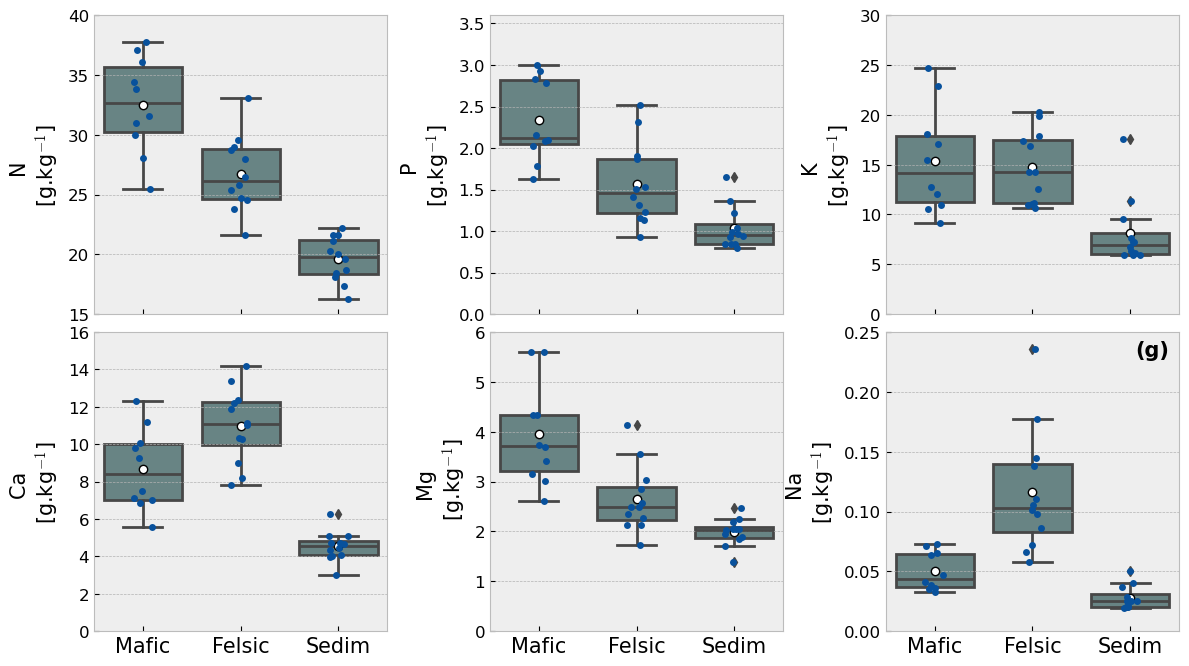

In [23]:
# Visualize canopy nutrient (Living leaves nutrient content)
#from matplotlib.font_manager import _Weight
fig=plt.figure(figsize=[14,8])
plt.subplots_adjust(wspace=0.35, hspace=0.06)
plt.style.use('bmh')
#plt.style.use("_mpl-gallery")

#plotting N concetration in the canopy living leaves
plt.subplot(2,3,1)
colors={"Mafic":"#00AFBB", "Felsic":"#E7B800", "Sedim":"#FC4E07"}
b=sns.boxplot(x='region', y='N_mass', data=traits_agg,color="#638889",showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black"})

#plt.text(2.4,38.5, "(a)", horizontalalignment='right', size=15, color='black', weight='bold')
# plt.text(0.04,38.5, "a", horizontalalignment='right', size=15, color='black')
# plt.text(1.05,33.9, "b", horizontalalignment='right', size=15, color='black')
# plt.text(2.02,23, "c", horizontalalignment='right', size=15, color='black')
plt.ylim(15,40)

sns.stripplot(x='region',
                            y='N_mass',

                            jitter=True,
                            dodge=True,
                            marker='o',
                            color="#08519c",
                            alpha=1,
                            data=traits_agg)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels("")
plt.ylabel('N \n[g.kg$^{-1}$]',size=15)
plt.xlabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
#plotting P concetration in the canopy living leaves
plt.subplot(2,3,2)
colors={"Mafic":"#00AFBB", "Felsic":"#E7B800", "Sedimentary":"#FC4E07"}
c=sns.boxplot(x='region', y='P', data=traits_agg,color="#638889",showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black"})


#plt.text(2.4,3.4, "(a)", horizontalalignment='right', size=15, color='black',weight='bold')
# plt.text(0.04,3.1, "a", horizontalalignment='right', size=15, color='black')
# plt.text(1.05,2.65, "b", horizontalalignment='right', size=15, color='black')
# plt.text(2.02,1.45, "c", horizontalalignment='right', size=15, color='black')
plt.ylim(0,3.6)

sns.stripplot(x='region',
                            y='P',

                            jitter=True,
                            dodge=True,
                            marker='o',
                            color="#08519c",
                            alpha=1,
                            data=traits_agg)
plt.ylabel('P \n[g.kg$^{-1}$]',size=15)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels("")
plt.xlabel("")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

#plotting K concetration in the canopy living leaves
plt.subplot(2,3,3)
colors={"Mafic":"#00AFBB", "Felsic":"#E7B800", "Sedimentary":"#FC4E07"}
sns.boxplot(x='region', y='K', data=traits_agg,color="#638889",showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black"})


#plt.text(2.4,28, "(b)", horizontalalignment='right', size=15, color='black',weight='bold')
# plt.text(0.04,25.5, "a", horizontalalignment='right', size=15, color='black')
# plt.text(1.04,21, "a", horizontalalignment='right', size=15, color='black')
# plt.text(2.02,10.5, "b", horizontalalignment='right', size=15, color='black')
plt.ylim(0,30)
plt.yticks(fontsize=15)
sns.stripplot(x='region',
                            y='K',

                            jitter=True,
                            dodge=True,
                            marker='o',
                            color="#08519c",
                            alpha=1,
                            data=traits_agg)

ax=plt.gca()
ax.axes.xaxis.set_ticklabels("")
plt.xlabel("")
plt.xlabel("")
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.ylabel('K \n[g.kg$^{-1}$]',size=15)


#plotting Ca concetration in the canopy living leaves
plt.subplot(2,3,4)

sns.boxplot(x='region', y='Ca', data=traits_agg, color="#638889",showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black"})



#plt.text(2.4,14.8, "(a)", horizontalalignment='right', size=15, color='black',weight='bold')
# plt.text(0.04,12.8, "a", horizontalalignment='right', size=15, color='black')
# plt.text(1.04,14.6, "a", horizontalalignment='right', size=15, color='black')
# plt.text(2.02,5.8, "b", horizontalalignment='right', size=15, color='black')
plt.ylim(0,16)
sns.stripplot(x='region',
                            y='Ca',

                            jitter=True,
                            dodge=True,
                            marker='o',
                            color="#08519c",
                            alpha=1,
                            data=traits_agg)
plt.xlabel("")
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.ylabel('Ca \n[g.kg$^{-1}$]',size=15)

#plotting Mg concetration in the canopy living leaves
plt.subplot(2,3,5)
sns.boxplot(x='region', y='Mg', data=traits_agg,color="#638889",showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black"})

#plt.text(2.4,5.6, "(a)", horizontalalignment='right', size=15, color='black',weight='bold')
# plt.text(0.04,5.8, "a", horizontalalignment='right', size=15, color='black')
# plt.text(1.04,3.8, "b", horizontalalignment='right', size=15, color='black')
# plt.text(2.02,2.5, "c", horizontalalignment='right', size=15, color='black')
plt.ylim(0,6)

sns.stripplot(x='region',
                            y='Mg',

                            jitter=True,
                            dodge=True,
                            marker='o',
                            color="#08519c",
                            alpha=1,
                            data=traits_agg)
ax=plt.gca()
plt.xlabel("")
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.ylabel('Mg \n [g.kg$^{-1}$]',size=15)

plt.subplot(2,3,6)
sns.boxplot(x='region', y='Na', data=traits_agg,color="#638889",showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black"})

plt.ylabel("Na \n [g/Kg]", size=15)

plt.text(2.4,0.23, "(g)", horizontalalignment='right', size=15, color='black',weight='bold')
# plt.text(0.04,0.08, "a", horizontalalignment='right', size=15, color='black')
# plt.text(1.04,0.185, "b", horizontalalignment='right', size=15, color='black')
# plt.text(2.02,0.05, "a", horizontalalignment='right', size=15, color='black')
plt.ylim(0,0.25)

sns.stripplot(x='region',
                            y='Na',

                            jitter=True,
                            dodge=True,
                            marker='o',
                            color="#08519c",
                            alpha=1,
                            data=traits_agg)
ax=plt.gca()
plt.xlabel("")
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)

plt.ylabel('Na \n[g.kg$^{-1}$]',size=15);

#fig.savefig('figures/Fig1.png', dpi=600,bbox_inches='tight', pad_inches=0);

## Loading litter data and calculating resorption efficiency




In [18]:
#load the litterfall data for the same regions
litter_data=pd.read_excel("230420_PLANT_JEREMY.xlsx")

litter_data.head()

Solution Label  Al 396.152 nm ppm  Al_mg_kg_dry_weight  Ca 422.673 nm ppm  \
0       Jeremy_1              0.737           589.776933              30.12   
1       Jeremy_2              0.706           572.819473              30.40   
2       Jeremy_3              0.442           349.925779              26.07   
3       Jeremy_4              0.690           545.185185              29.03   
4       Jeremy_5              0.323           249.000241              25.85   

   Ca_mg_kg_dry_weight  Fe 234.350 nm ppm  Fe_mg_kg_dry_weight  \
0          24103.23097               0.71           318.095429   
1          24665.31440               0.68           298.174442   
2          20639.28748               0.43            93.023256   
3          22937.28395               0.64           258.765432   
4          19927.72826               0.38            52.035654   

   K 766.491 nm ppm  K_mg_kg_dry_weight  Mg 285.213 nm ppm  ...  \
0              8.83         5631.689507               4.66  ...   
1             10.01         6667.342799               4.11  ...   
2             11.78         7906.976744               3.53  ...   
3              8.97         5671.111111               3.81  ...   
4              7.78         4615.755240               3.64  ...   

   Dry_weight_kg  Label_ID  Dilution_Factor  Extraction_volume_l  plotID  \
0       0.000200       J01              4.0                 0.04    UPL1   
1       0.000197       J02              4.0                 0.04    UPL1   
2       0.000202       J03              4.0                 0.04    UPL1   
3       0.000202       J04              4.0                 0.04    UPL1   
4       0.000208       J05              4.0                 0.04    UPL2   

   BLK_Average_Fe  BLK_average_K  BLK_Average_P  Season Region  
0          0.3125         1.7925          0.519      WR    UPL  
1             NaN            NaN            NaN      WD    UPL  
2             NaN            NaN            NaN      SR    UPL  
3             NaN            NaN            NaN      SD    UPL  
4             NaN            NaN            NaN      WR    UPL  

[5 rows x 28 columns]

In [19]:
#subset the litter data to have a smaller size of the data
litter_data=litter_data[['plotID',"Season",'Ca_mg_kg_dry_weight', 'K_mg_kg_dry_weight',
       'Mg_mg_kg_dry_weight',
       'P_mg_kg_dry_weight']]

litter_data.head()

plotID Season  Ca_mg_kg_dry_weight  K_mg_kg_dry_weight  Mg_mg_kg_dry_weight  \
0   UPL1     WR          24103.23097         5631.689507          3729.118736   
1   UPL1     WD          24665.31440         6667.342799          3334.685598   
2   UPL1     SR          20639.28748         7906.976744          2794.656111   
3   UPL1     SD          22937.28395         5671.111111          3010.370370   
4   UPL2     WR          19927.72826         4615.755240          2806.070826   

   P_mg_kg_dry_weight  
0          977.093128  
1          894.117647  
2          729.935675  
3          820.938272  
4         1131.679113

In [21]:
# write a function that converts biomass values to g/kg 

from numpy.ma.extras import isin

numeric_columns=['Ca_mg_kg_dry_weight', 'K_mg_kg_dry_weight',
       'Mg_mg_kg_dry_weight',
       'P_mg_kg_dry_weight']

def convert_cols(df):
  for column in numeric_columns:
    df[column]=df[column]/1000

  return df

# apply the function to the litter dataframe
litter_df=convert_cols(litter_data)

litter_df.head()

plotID Season  Ca_mg_kg_dry_weight  K_mg_kg_dry_weight  Mg_mg_kg_dry_weight  \
0   UPL1     WR            24.103231            5.631690             3.729119   
1   UPL1     WD            24.665314            6.667343             3.334686   
2   UPL1     SR            20.639287            7.906977             2.794656   
3   UPL1     SD            22.937284            5.671111             3.010370   
4   UPL2     WR            19.927728            4.615755             2.806071   

   P_mg_kg_dry_weight  
0            0.977093  
1            0.894118  
2            0.729936  
3            0.820938  
4            1.131679

In [15]:
#check if plotID column is correct in the litter data too
print(litter_df.shape)
print(litter_df.plotID.unique())

(126, 6)
['UPL1' 'UPL2' 'UPL3' 'UPL4' 'UPL5' 'UPL6' 'UPL7' 'UPL8' 'UPL9' 'UPL10'
 'UPL11' 'UPL12' 'IPE_1_4_157_45' 'IPE_2_1_124_46' 'BLK1' 'BLK2' 'KBPL6'
 'KBPL11' 'KBPL12' 'KBPL13' 'KBPL14' 'KBPL15' 'KBPL16' 'NPL1' 'NPL2'
 'NPL3' 'NPL4' 'NPL6' 'NPL7' 'NPL8' 'NPL9' 'NPL10' 'NPL11' 'NPL12'
 'KBPL10']


In [22]:
#remove rows that represents standards. These are note needed for the analysis
list_values=['IPE_1_4_157_45','IPE_2_1_124_46', 'BLK1', 'BLK2']
litter_df=litter_df[litter_df.plotID.isin(list_values)==False]
#check if plotID column is now correct in the litter
print(litter_df.shape)
print(litter_df.plotID.unique())


(118, 6)
['UPL1' 'UPL2' 'UPL3' 'UPL4' 'UPL5' 'UPL6' 'UPL7' 'UPL8' 'UPL9' 'UPL10'
 'UPL11' 'UPL12' 'KBPL6' 'KBPL11' 'KBPL12' 'KBPL13' 'KBPL14' 'KBPL15'
 'KBPL16' 'NPL1' 'NPL2' 'NPL3' 'NPL4' 'NPL6' 'NPL7' 'NPL8' 'NPL9' 'NPL10'
 'NPL11' 'NPL12' 'KBPL10']


In this dataset the plotID will change as follows:

KBPL13>>>>>>KBPL5

KBPL14>>>>>>KBPL1

KBPL15>>>>>>KBPL8

KBPL16>>>>>>KBPL9


This is because some plots in the Congo were relocated due to security concerns

In [ ]:
#rename plotID
# litter_df=litter_df.replace({"plotID":{"KBPL13":"KBPL5","KBPL14":"KBPL1",
#                                        "KBPL15":"KBPL8","KBPL16":"KBPL9"}})

# print(litter_df.plotID.unique())

In [23]:
# look at the data structure

litter_df.head()

plotID Season  Ca_mg_kg_dry_weight  K_mg_kg_dry_weight  Mg_mg_kg_dry_weight  \
0   UPL1     WR            24.103231            5.631690             3.729119   
1   UPL1     WD            24.665314            6.667343             3.334686   
2   UPL1     SR            20.639287            7.906977             2.794656   
3   UPL1     SD            22.937284            5.671111             3.010370   
4   UPL2     WR            19.927728            4.615755             2.806071   

   P_mg_kg_dry_weight  
0            0.977093  
1            0.894118  
2            0.729936  
3            0.820938  
4            1.131679

In [25]:
#load litter fall CN data

litter_cn=pd.read_excel("litter_cn.xlsx")
#drop the season column
litter_cn.head()

plotID region Season  litter_C  litter_N
0  KBPL10  Mafic     SR      42.8       2.2
1  KBPL11  Mafic     WR      43.7       1.8
2  KBPL11  Mafic     WD      43.6       2.0
3  KBPL11  Mafic     SR      43.6       1.6
4  KBPL11  Mafic     SD      43.4       1.9

In [26]:
litter_cn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   plotID    118 non-null    object 
 1   region    118 non-null    object 
 2   Season    118 non-null    object 
 3   litter_C  118 non-null    float64
 4   litter_N  118 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.7+ KB


In [27]:
#convert litterfall C an N in g/kg too
litter_cn["litter_C"]=litter_cn["litter_C"]*10
litter_cn["litter_N"]=litter_cn["litter_N"]*10
litter_cn.head()

plotID region Season  litter_C  litter_N
0  KBPL10  Mafic     SR     428.0      22.0
1  KBPL11  Mafic     WR     437.0      18.0
2  KBPL11  Mafic     WD     436.0      20.0
3  KBPL11  Mafic     SR     436.0      16.0
4  KBPL11  Mafic     SD     434.0      19.0

In this dataset the plotID will change as follows:

KBPL13>>>>>>KBPL5

KBPL14>>>>>>KBPL1

KBPL15>>>>>>KBPL8

KBPL16>>>>>>KBPL9


This is because some plots in the Congo were relocated due to security concerns

In [20]:
print(litter_cn.plotID.unique())

['KBPL10' 'KBPL11' 'KBPL12' 'KBPL13' 'KBPL14' 'KBPL15' 'KBPL16' 'KBPL6'
 'NPL1' 'NPL10' 'NPL11' 'NPL12' 'NPL2' 'NPL3' 'NPL4' 'NPL6' 'NPL7' 'NPL8'
 'NPL9' 'UPL1' 'UPL10' 'UPL11' 'UPL12' 'UPL2' 'UPL3' 'UPL4' 'UPL5' 'UPL6'
 'UPL7' 'UPL8' 'UPL9']


In [ ]:
#rename plotID in litter CN data as well
# litter_cn=litter_cn.replace({"plotID":{"KBPL13":"KBPL5","KBPL14":"KBPL1",
#                                        "KBPL15":"KBPL8","KBPL16":"KBPL9"}})

# print(litter_cn.plotID.unique())

In [28]:
#merge liter data and litter CN data
litter_df=litter_df.merge(litter_cn, on=["plotID", "Season"], how="left")

litter_df.head()

plotID Season  Ca_mg_kg_dry_weight  K_mg_kg_dry_weight  Mg_mg_kg_dry_weight  \
0   UPL1     WR            24.103231            5.631690             3.729119   
1   UPL1     WD            24.665314            6.667343             3.334686   
2   UPL1     SR            20.639287            7.906977             2.794656   
3   UPL1     SD            22.937284            5.671111             3.010370   
4   UPL1     SD            22.937284            5.671111             3.010370   

   P_mg_kg_dry_weight  region  litter_C  litter_N  
0            0.977093  Felsic     421.0      24.0  
1            0.894118  Felsic     443.0      23.0  
2            0.729936  Felsic     419.0      22.0  
3            0.820938  Felsic     423.0      24.0  
4            0.820938  Felsic     413.0      23.0

In [24]:
litter_df.shape

(123, 9)

In [29]:
# delete the column season as it is not needed in the analzsis and Verify missing values in the litter data
litter_df=litter_df.drop(columns="Season", axis=1)
litter_df.isna().sum()

plotID                 0
Ca_mg_kg_dry_weight    0
K_mg_kg_dry_weight     0
Mg_mg_kg_dry_weight    0
P_mg_kg_dry_weight     0
region                 6
litter_C               6
litter_N               6
dtype: int64

In [31]:
litter_df_agg=litter_df.groupby(by=["plotID", "region"]).mean().reset_index()
litter_df_agg.head()

plotID region  Ca_mg_kg_dry_weight  K_mg_kg_dry_weight  \
0  KBPL10  Mafic            17.213000            8.920000   
1  KBPL11  Mafic            18.272905            7.237891   
2  KBPL12  Mafic            16.684012            3.713351   
3  KBPL13  Mafic            14.611741            3.148967   
4  KBPL14  Mafic            14.480983            2.560095   

   Mg_mg_kg_dry_weight  P_mg_kg_dry_weight  litter_C  litter_N  
0             4.113000            2.233000    428.00     22.00  
1             4.011445            1.622903    435.75     18.25  
2             7.018714            1.946526    443.75     19.50  
3             7.131015            1.636399    431.00     20.50  
4             7.432306            1.399055    439.25     26.00

In [37]:
#Verify missing values in the litter data again
print(litter_df_agg.shape)
litter_df_agg.isna().sum()

(31, 8)


plotID                 0
region                 0
Ca_mg_kg_dry_weight    0
K_mg_kg_dry_weight     0
Mg_mg_kg_dry_weight    0
P_mg_kg_dry_weight     0
litter_C               0
litter_N               0
dtype: int64

In [33]:
print(litter_df_agg.plotID.unique())
print(traits_agg.plotID.unique())

['KBPL10' 'KBPL11' 'KBPL12' 'KBPL13' 'KBPL14' 'KBPL15' 'KBPL16' 'KBPL6'
 'NPL1' 'NPL10' 'NPL11' 'NPL12' 'NPL2' 'NPL3' 'NPL4' 'NPL6' 'NPL7' 'NPL8'
 'NPL9' 'UPL1' 'UPL10' 'UPL11' 'UPL12' 'UPL2' 'UPL3' 'UPL4' 'UPL5' 'UPL6'
 'UPL7' 'UPL8' 'UPL9']
['KBPL1' 'KBPL10' 'KBPL11' 'KBPL12' 'KBPL4' 'KBPL5' 'KBPL6' 'KBPL7'
 'KBPL8' 'KBPL9' 'UPL1' 'UPL10' 'UPL11' 'UPL12' 'UPL2' 'UPL3' 'UPL4'
 'UPL5' 'UPL6' 'UPL7' 'UPL8' 'UPL9' 'NPL1' 'NPL10' 'NPL11' 'NPL12' 'NPL2'
 'NPL3' 'NPL4' 'NPL5' 'NPL6' 'NPL7' 'NPL8' 'NPL9']


In [47]:
#merge the litter data and fresh leaves
litter_fresh_df_agg=litter_df_agg.merge(traits_agg[["plotID","N_mass","C_mass","P","K","CN","NP","Mg","Ca"]], on="plotID", how="inner")
print(litter_fresh_df_agg.shape)
litter_fresh_df_agg.head()

(27, 16)


plotID       region  Ca_mg_kg_dry_weight  K_mg_kg_dry_weight  \
0  KBPL10        Mafic            17.213000            8.920000   
1  KBPL11        Mafic            18.272905            7.237891   
2  KBPL12        Mafic            16.684012            3.713351   
3   KBPL6        Mafic            18.634068            4.807062   
4    NPL1  Sedimentary             5.459219            0.782710   

   Mg_mg_kg_dry_weight  P_mg_kg_dry_weight    litter_C   litter_N     N_mass  \
0             4.113000            2.233000  428.000000  22.000000  33.857574   
1             4.011445            1.622903  435.750000  18.250000  28.049149   
2             7.018714            1.946526  443.750000  19.500000  25.471390   
3             5.470394            1.727377  436.000000  25.333333  31.531142   
4             1.338704            0.187631  470.571429  17.285714  18.656642   

       C_mass         P          K         CN         NP        Mg         Ca  
0  455.139414  2.926664  17.117632  13.442765  11.568656  3.696900  12.319769  
1  462.611250  2.833704  15.504388  16.492880   9.898405  3.143740  11.207066  
2  484.933781  1.630316  10.967192  19.038372  15.623589  3.007433   6.852107  
3  456.493925  2.161889  10.539101  14.477558  14.584993  5.608900   9.281973  
4  493.595290  0.986371   7.222998  26.456813  18.914429  2.195004   6.263890

In [33]:
litter_fresh_df_agg.plotID.unique()

array(['KBPL10', 'KBPL11', 'KBPL12', 'KBPL6', 'NPL1', 'NPL10', 'NPL11',
       'NPL12', 'NPL2', 'NPL3', 'NPL4', 'NPL6', 'NPL7', 'NPL8', 'NPL9',
       'UPL1', 'UPL10', 'UPL11', 'UPL12', 'UPL2', 'UPL3', 'UPL4', 'UPL5',
       'UPL6', 'UPL7', 'UPL8', 'UPL9'], dtype=object)

In [48]:
#correct the values of N, K and P using the value Ca as a tracer a lement
litter_fresh_df_agg["tracer"]=litter_fresh_df_agg["Ca"]/litter_fresh_df_agg["Ca_mg_kg_dry_weight"]
litter_fresh_df_agg["lit_N_adj"]=litter_fresh_df_agg["litter_N"]*litter_fresh_df_agg["tracer"]
litter_fresh_df_agg["lit_K_adj"]=litter_fresh_df_agg["K_mg_kg_dry_weight"]*litter_fresh_df_agg["tracer"]
litter_fresh_df_agg["lit_P_adj"]=litter_fresh_df_agg["P_mg_kg_dry_weight"]*litter_fresh_df_agg["tracer"]
litter_fresh_df_agg["lit_Mg_adj"]=litter_fresh_df_agg["Mg_mg_kg_dry_weight"]*litter_fresh_df_agg["tracer"]


In [49]:
# calaculate the resorption efficiency rate
litter_fresh_df_agg["N_resorp"]=(litter_fresh_df_agg["N_mass"]-litter_fresh_df_agg["lit_N_adj"])*100/litter_fresh_df_agg["N_mass"]
litter_fresh_df_agg["K_resorp"]=(litter_fresh_df_agg["K"]-litter_fresh_df_agg["lit_K_adj"])*100/litter_fresh_df_agg["K"]
litter_fresh_df_agg["P_resorp"]=(litter_fresh_df_agg["P"]-litter_fresh_df_agg["lit_P_adj"])*100/litter_fresh_df_agg["P"]
litter_fresh_df_agg["Mg_resorp"]=(litter_fresh_df_agg["Mg"]-litter_fresh_df_agg["lit_Mg_adj"])*100/litter_fresh_df_agg["Mg"]
litter_fresh_df_agg.head()

plotID       region  Ca_mg_kg_dry_weight  K_mg_kg_dry_weight  \
0  KBPL10        Mafic            17.213000            8.920000   
1  KBPL11        Mafic            18.272905            7.237891   
2  KBPL12        Mafic            16.684012            3.713351   
3   KBPL6        Mafic            18.634068            4.807062   
4    NPL1  Sedimentary             5.459219            0.782710   

   Mg_mg_kg_dry_weight  P_mg_kg_dry_weight    litter_C   litter_N     N_mass  \
0             4.113000            2.233000  428.000000  22.000000  33.857574   
1             4.011445            1.622903  435.750000  18.250000  28.049149   
2             7.018714            1.946526  443.750000  19.500000  25.471390   
3             5.470394            1.727377  436.000000  25.333333  31.531142   
4             1.338704            0.187631  470.571429  17.285714  18.656642   

       C_mass  ...         Ca    tracer  lit_N_adj  lit_K_adj  lit_P_adj  \
0  455.139414  ...  12.319769  0.715725  15.745943   6.384264   1.598213   
1  462.611250  ...  11.207066  0.613316  11.193018   4.439115   0.995352   
2  484.933781  ...   6.852107  0.410699   8.008630   1.525069   0.799436   
3  456.493925  ...   9.281973  0.498118  12.619001   2.394486   0.860438   
4  493.595290  ...   6.263890  1.147397  19.833572   0.898079   0.215288   

   lit_Mg_adj   N_resorp   K_resorp   P_resorp  Mg_resorp  
0    2.943776  53.493589  62.703580  45.391308  20.371786  
1    2.460283  60.094982  71.368655  64.874511  21.740237  
2    2.882579  68.558330  86.094258  50.964346   4.151535  
3    2.724904  59.979246  77.279978  60.199699  51.418205  
4    1.536024  -6.308370  87.566394  78.173771  30.021796  

[5 rows x 25 columns]

In [ ]:
#replace zeros to avoid vdivision with zero which resulted in infinity
# litter_fresh_df_agg=litter_fresh_df_agg.replace([np.inf, -np.inf],0)
#litter_fresh_df_agg.query('region=="Sedimentary"')

In [53]:
# calculate the ratio of nitrogen resorption to Phosphorus resorption 
litter_fresh_df_agg["NP_resorp"]=litter_fresh_df_agg["N_resorp"]/litter_fresh_df_agg["P_resorp"]
litter_fresh_df_agg["NK_resorp"]=litter_fresh_df_agg["N_resorp"]/litter_fresh_df_agg["K_resorp"]
litter_fresh_df_agg["NMg_resorp"]=litter_fresh_df_agg["N_resorp"]/litter_fresh_df_agg["Mg_resorp"]
litter_fresh_df_agg.head()

plotID       region  Ca_mg_kg_dry_weight  K_mg_kg_dry_weight  \
0  KBPL10        Mafic            17.213000            8.920000   
1  KBPL11        Mafic            18.272905            7.237891   
2  KBPL12        Mafic            16.684012            3.713351   
3   KBPL6        Mafic            18.634068            4.807062   
4    NPL1  Sedimentary             5.459219            0.782710   

   Mg_mg_kg_dry_weight  P_mg_kg_dry_weight    litter_C   litter_N     N_mass  \
0             4.113000            2.233000  428.000000  22.000000  33.857574   
1             4.011445            1.622903  435.750000  18.250000  28.049149   
2             7.018714            1.946526  443.750000  19.500000  25.471390   
3             5.470394            1.727377  436.000000  25.333333  31.531142   
4             1.338704            0.187631  470.571429  17.285714  18.656642   

       C_mass  ...  lit_K_adj  lit_P_adj  lit_Mg_adj   N_resorp   K_resorp  \
0  455.139414  ...   6.384264   1.598213    2.943776  53.493589  62.703580   
1  462.611250  ...   4.439115   0.995352    2.460283  60.094982  71.368655   
2  484.933781  ...   1.525069   0.799436    2.882579  68.558330  86.094258   
3  456.493925  ...   2.394486   0.860438    2.724904  59.979246  77.279978   
4  493.595290  ...   0.898079   0.215288    1.536024  -6.308370  87.566394   

    P_resorp  Mg_resorp  NP_resorp  NK_resorp  NMg_resorp  
0  45.391308  20.371786   1.178499   0.853119    2.625866  
1  64.874511  21.740237   0.926327   0.842036    2.764228  
2  50.964346   4.151535   1.345221   0.796317   16.513970  
3  60.199699  51.418205   0.996338   0.776129    1.166498  
4  78.173771  30.021796  -0.080697  -0.072041   -0.210126  

[5 rows x 28 columns]

In [54]:
# rename the seimentaryu region to sedim:

litter_fresh_df_agg=litter_fresh_df_agg.replace({"region":{"Sedimentary":"Sedim"}})
litter_fresh_df_agg.region.unique()

array(['Mafic', 'Sedim', 'Felsic'], dtype=object)

In [68]:
#save cleaned data:litter, living leaves and resorption rate data
litter_fresh_df_agg.to_csv("processed/litter_fresh_df_agg.csv", index=False)

In [73]:
litter_fresh_df_agg.query('N_resorp>0')

plotID  region  Ca_mg_kg_dry_weight  K_mg_kg_dry_weight  \
0   KBPL10   Mafic            17.213000            8.920000   
1   KBPL11   Mafic            18.272905            7.237891   
2   KBPL12   Mafic            16.684012            3.713351   
3    KBPL6   Mafic            18.634068            4.807062   
5    NPL10   Sedim             7.971692            2.160785   
6    NPL11   Sedim             9.467817            2.773072   
7    NPL12   Sedim            13.592654            5.606675   
8     NPL2   Sedim             5.460530            1.094837   
9     NPL3   Sedim             4.333474            0.861895   
10    NPL4   Sedim             7.914114            1.994263   
11    NPL6   Sedim             5.750331            4.733059   
12    NPL7   Sedim             5.619824            1.529291   
13    NPL8   Sedim             4.733388            1.373912   
14    NPL9   Sedim             6.085435            2.204838   
15    UPL1  Felsic            23.056480            6.309646   
16   UPL10  Felsic            23.299188            8.912428   
17   UPL11  Felsic            21.201083            6.617072   
18   UPL12  Felsic            16.730922            6.532223   
19    UPL2  Felsic            21.923396            7.220765   
20    UPL3  Felsic            23.633521            8.411299   
21    UPL4  Felsic            19.096866            7.135437   
22    UPL5  Felsic            21.270922            6.744922   
23    UPL6  Felsic            22.245943            6.481974   
24    UPL7  Felsic            20.288307            4.608530   
25    UPL8  Felsic            19.836174            6.176606   
26    UPL9  Felsic            24.066555            4.790708   

    Mg_mg_kg_dry_weight  P_mg_kg_dry_weight  litter_C   litter_N     N_mass  \
0              4.113000            2.233000    428.00  22.000000  33.857574   
1              4.011445            1.622903    435.75  18.250000  28.049149   
2              7.018714            1.946526    443.75  19.500000  25.471390   
3              5.470394            1.727377    436.00  25.333333  31.531142   
5              2.112537            0.307684    483.50  14.750000  18.076237   
6              2.466953            0.503212    486.75  15.000000  20.287554   
7              4.088627            1.401224    467.50  17.500000  16.238767   
8              1.458344            0.231183    461.25  15.750000  19.612647   
9              1.339962            0.190354    467.75  17.250000  21.075763   
10             1.552078            0.322594    478.50  16.500000  18.418484   
11             0.740475            0.250478    472.25  17.500000  21.580605   
12             1.600013            0.275992    515.00  20.000000  20.008983   
13             1.578666            0.209365    475.50  18.250000  21.607809   
14             1.935152            0.256922    478.00  17.000000  22.203118   
15             3.175840            0.848605    423.80  23.200000  25.821806   
16             4.417934            1.015972    433.00  26.750000  26.482328   
17             3.184462            0.688343    431.75  22.500000  28.964010   
18             3.924112            0.544298    437.25  22.000000  25.381488   
19             3.189041            1.215095    434.00  23.666667  23.804670   
20             2.919355            1.106178    437.75  22.500000  21.647725   
21             3.715175            0.778449    465.00  24.600000  33.045250   
22             3.914254            0.731234    440.50  22.250000  24.528559   
23             3.429990            0.800829    416.75  23.250000  24.701642   
24             3.740385            0.425377    451.00  22.500000  27.960197   
25             4.112613            0.620893    449.25  23.500000  29.535330   
26             3.960955            0.547011    438.00  23.000000  28.747764   

        C_mass  ...  lit_K_adj  lit_P_adj  lit_Mg_adj   N_resorp   K_resorp  \
0   455.139414  ...   6.384264   1.598213    2.943776  53.493589  62.703580   
1   462.61

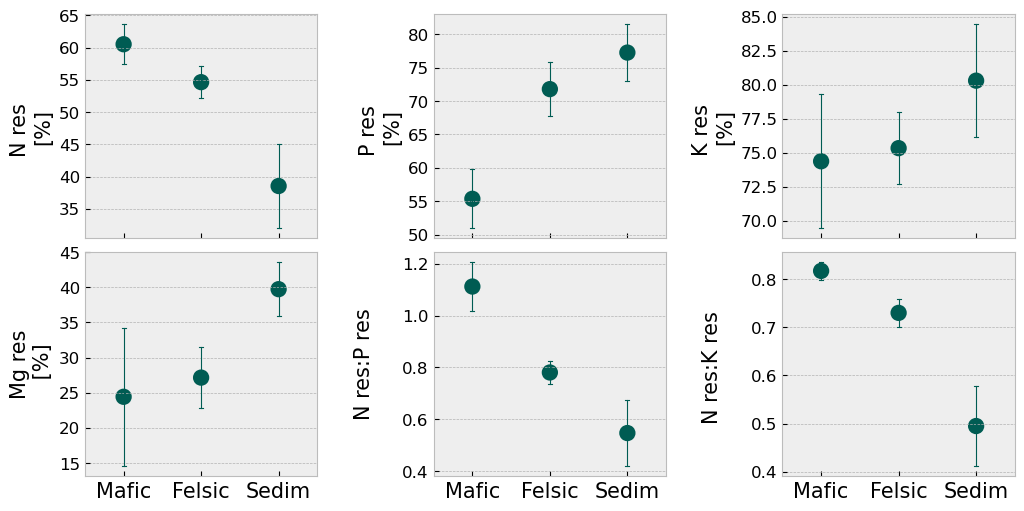

In [75]:
#create point plots
fig=plt.figure(figsize=[12,6])
plt.style.use('bmh')
#plt.style.use("_mpl-gallery")

#colors={"Mafic":"#008170", "Felsic":"#99B080", "Sedim":"#E7B800"}
colors={"Mafic":"#005C53", "Felsic":"#005C53", "Sedim":"#005C53"}

plt.subplots_adjust(wspace=0.5, hspace=0.06)

plt.subplot(2,3,1)

sns.pointplot(x="region",y='N_resorp',estimator="mean",errorbar="se", capsize=.05, linestyles="", dodge=0.3,
errwidth=0.8,palette=colors,data=litter_fresh_df_agg,order=colors)
plt.xlabel("")
plt.ylabel('N res \n[%]',size=15)
plt.yticks(fontsize=12)
#plt.legend(loc="upper left")
ax=plt.gca()
ax.axes.xaxis.set_ticklabels("")


plt.subplot(2,3,2)
sns.pointplot(x="region",y='P_resorp',estimator="mean",errorbar="se", capsize=.05, linestyles="", dodge=0.3,
errwidth=0.8,palette=colors,data=litter_fresh_df_agg,order=colors)
plt.xlabel("")
plt.ylabel('P res \n[%]',size=15)
plt.yticks(fontsize=12)
ax=plt.gca()
ax.axes.xaxis.set_ticklabels("")

plt.subplot(2,3,3)
sns.pointplot(x="region",y='K_resorp',estimator="mean",errorbar="se", capsize=.05, linestyles="", dodge=0.3,
errwidth=0.8,order=colors,palette=colors,data=litter_fresh_df_agg)
plt.xlabel("")
plt.ylabel('K res \n[%]',size=15)
plt.yticks(fontsize=12)

ax=plt.gca()
ax.axes.xaxis.set_ticklabels("")

plt.subplot(2,3,4)

sns.pointplot(x="region",y='Mg_resorp',estimator="mean",errorbar="se", capsize=.05, linestyles="", dodge=0.3,
errwidth=0.8,palette=colors,data=litter_fresh_df_agg,order=colors)
plt.xlabel("")
plt.ylabel('Mg res\n [%]',size=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
# ax=plt.gca()
# ax.axes.xaxis.set_ticklabels("")


plt.subplot(2,3,5)
sns.pointplot(x="region",y='NP_resorp',estimator="mean",errorbar="se", capsize=.05, linestyles="", dodge=0.3,
errwidth=0.8,palette=colors,data=litter_fresh_df_agg,order=colors)
plt.xlabel("")
plt.ylabel('N res:P res\n',size=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
#ax=plt.gca()
#ax.axes.xaxis.set_ticklabels("")


plt.subplot(2,3,6)
sns.pointplot(x="region",y='NK_resorp',estimator="mean",errorbar="se",capsize=.05, linestyles="", dodge=0.3,errwidth=0.8
,palette=colors,data=litter_fresh_df_agg,order=colors)
plt.ylabel('N res:K res \n',size=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.xlabel("");
#fig.savefig('figures/Fig3.png', dpi=600,bbox_inches='tight', pad_inches=0);


In [76]:
#merging CN data for both litterfall and fresh leaves

litter_cn["CN"]=litter_cn["litter_C"]/litter_cn["litter_N"]
litter_cn["type"]="Litter fall"
traits_agg["type"]="Living leaves"
litter_cn.head()
#concatinate the two dataframe
cn_data=pd.concat([litter_cn[["plotID","region","CN","type"]],traits_agg[["plotID","region","CN","type"]]])
#rename regions
cn_data=cn_data.replace({"region":{"Mixed":"Sedim"}})
print(cn_data.shape)
cn_data.head()

(152, 4)


plotID region         CN         type
0  KBPL10  Mafic  19.454545  Litter fall
1  KBPL11  Mafic  24.277778  Litter fall
2  KBPL11  Mafic  21.800000  Litter fall
3  KBPL11  Mafic  27.250000  Litter fall
4  KBPL11  Mafic  22.842105  Litter fall

In [64]:
#load the litter layer

# df_litter_layer=pd.read_excel("c:/Users/bebu0001/slu/paper-projects/eco-analysis/original/litter_layer_cn.xlsx")
# df_litter_layer["type"]="Litter layer"
# df_litter_layer.head()

plotID region    sampleID  Litter_n  litteter_c         CN          type
0  KBPL10  Mafic    KBPL10PL  2.509290   39.437630  15.716650  Litter layer
1  KBPL11  Mafic     KBPL11L  2.997642   41.174469  13.735618  Litter layer
2   KBPL1  Mafic      KBPL1L  2.576051   41.210064  15.997376  Litter layer
3  KBPL12  Mafic      KBPL12  2.753466   40.306049  14.726134  Litter layer
4   KBPL2  Mafic  KBPL2CompL  1.939930   45.299126  23.350906  Litter layer

In [ ]:
#concatinate all cn dataframes
# all_cn_data=pd.concat([df_litter_layer[["plotID","region","CN","type"]],df_O_layer_cn[["plotID","region","CN","type"]], cn_data])
# print(all_cn_data.type.unique())
# all_cn_data.head()

['Litter layer' 'O-horizon' 'Litter fall' 'Living leaves']


plotID region         CN          type
0  KBPL10  Mafic   15.71665  Litter layer
1  KBPL11  Mafic  13.735618  Litter layer
2   KBPL1  Mafic  15.997376  Litter layer
3  KBPL12  Mafic  14.726134  Litter layer
4   KBPL2  Mafic  23.350906  Litter layer

In [ ]:
# all_cn_data["CN"]=all_cn_data["CN"].astype("float")
# all_cn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 33
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   plotID  227 non-null    object 
 1   region  227 non-null    object 
 2   CN      227 non-null    float64
 3   type    227 non-null    object 
dtypes: float64(1), object(3)
memory usage: 8.9+ KB


In [ ]:
#export all CN data
#all_cn_data.to_csv("all_cn_data.csv", index=False)

In [78]:
#load the preprocessed data
all_cn_data=pd.read_csv("all_cn_data.csv")
#load soil data and sample ids
sample_id=pd.read_excel("sample_id.xlsx")
soil_10=pd.read_excel("soil_phy_chem.xlsx" )
CN_soil=pd.read_excel("soil_carbon.xlsx" )

soil_10=pd.merge(soil_10, sample_id, how='inner',on='sampleID', suffixes=("_x","_y"))
#add the soil CN data
soil_10=pd.merge(soil_10, CN_soil, how='inner',on='sampleID')

soil_10.head()

sampleID   clay   silt   sand  BD_m_soil   WHC  pH_KCl  P_avail  \
0  KBPL10C1  46.88  14.00  39.12      0.822  0.44    5.40    32.78   
1  KBPL11C1  27.60  10.00  62.40      0.654  0.46    4.35    35.25   
2  KBPL12C1  24.88  12.00  63.12      0.687  0.45    3.60    33.76   
3   KBPL1C1  61.60  19.28  19.12      0.768  0.62    3.27    37.70   
4   KBPL2C1  51.60   9.28  39.12      0.768  0.81    3.32    52.61   

   exch_acidity_Al  exch_acidity_H  ...  no_Mn_ox_extract  \
0              0.0           0.758  ...                 1   
1              0.0           1.900  ...             -9999   
2              4.8           0.509  ...             -9999   
3              6.0           0.446  ...                 1   
4              7.2           1.142  ...             -9999   

   mean_Mn_dcb_extract  sd_Mn_dcb_extract  no_Mn_dcb_extract  plotID  depth  \
0              0.07340            -9999.0                  1  KBPL10     C1   
1          -9999.00000            -9999.0              -9999  KBPL11     C1   
2          -9999.00000            -9999.0              -9999  KBPL12     C1   
3              0.07555            -9999.0                  1   KBPL1     C1   
4          -9999.00000            -9999.0              -9999   KBPL2     C1   

   depth_int  region        N         C  
0       10cm   Mafic  0.95088   8.58088  
1       10cm   Mafic  0.72923   7.53175  
2       10cm   Mafic  0.93539   9.74146  
3       10cm   Mafic  0.49309   4.73554  
4       10cm   Mafic  0.86402  11.14913  

[5 rows x 199 columns]

In [114]:
soil_10.region.unique()

array(['Mafic', 'Sedim', 'Felsic'], dtype=object)

In [79]:
soil_10=soil_10.query('depth=="C1"')
variables=["plotID","region","pH_KCl","ECEC","P_avail","exch_bases_K","exch_bases_Ca","exch_bases_Mg","exch_bases_Na","N", "C",
           "mean_P_bulk_ICPOES","mean_K_bulk_ICPOES","mean_Ca_bulk_OES","mean_Mg_bulk_ICPOES","mean_Na_bulk_ICPOES"]


# Keep columns defined in the list varibles
soil_10=soil_10[variables]


#rename the columns of soil properties for top 10 cm
soil_10=soil_10.rename(columns={"C":"Total_C","N":"Total_N","exch_bases_Na":"Na_ex","exch_bases_K":"K_ex","exch_bases_Ca":"Ca_ex","exch_bases_Mg":"Mg_ex",
                                "mean_Ca_bulk_OES":"Total_Ca", "mean_K_bulk_ICPOES":"Total_K","mean_Mg_bulk_ICPOES":"Total_Mg",
                                "mean_P_bulk_ICPOES":"Total_P","mean_Na_bulk_ICPOES":"Total_Na"})

soil_10.head()

plotID region  pH_KCl    ECEC  P_avail   K_ex   Ca_ex  Mg_ex  Na_ex  \
0  KBPL10  Mafic    5.40  33.206    32.78  0.793  24.251  7.359  0.043   
1  KBPL11  Mafic    4.35  15.772    35.25  1.279   8.972  3.578  0.043   
2  KBPL12  Mafic    3.60   9.991    33.76  0.332   2.904  1.405  0.040   
3   KBPL1  Mafic    3.27   8.844    37.70  0.281   1.667  0.449  0.000   
4   KBPL2  Mafic    3.32  10.596    52.61  0.332   1.417  0.504  0.000   

   Total_N   Total_C      Total_P      Total_K     Total_Ca     Total_Mg  \
0  0.95088   8.58088     0.218462     0.138750     0.796442     0.367500   
1  0.72923   7.53175 -9999.000000 -9999.000000 -9999.000000 -9999.000000   
2  0.93539   9.74146     0.160000     0.088235     0.087402     0.180588   
3  0.49309   4.73554     0.144700     0.086600     0.022400     0.198500   
4  0.86402  11.14913     0.167157     0.091996     0.038776     0.192732   

      Total_Na  
0     0.043942  
1 -9999.000000  
2     0.015637  
3     0.019250  
4     0.023091

In [80]:
#replace all values under detection limit with zero
soil_10=soil_10.replace({-9999.000000:0.1})
soil_10.head()

plotID region  pH_KCl    ECEC  P_avail   K_ex   Ca_ex  Mg_ex  Na_ex  \
0  KBPL10  Mafic    5.40  33.206    32.78  0.793  24.251  7.359  0.043   
1  KBPL11  Mafic    4.35  15.772    35.25  1.279   8.972  3.578  0.043   
2  KBPL12  Mafic    3.60   9.991    33.76  0.332   2.904  1.405  0.040   
3   KBPL1  Mafic    3.27   8.844    37.70  0.281   1.667  0.449  0.000   
4   KBPL2  Mafic    3.32  10.596    52.61  0.332   1.417  0.504  0.000   

   Total_N   Total_C   Total_P   Total_K  Total_Ca  Total_Mg  Total_Na  
0  0.95088   8.58088  0.218462  0.138750  0.796442  0.367500  0.043942  
1  0.72923   7.53175  0.100000  0.100000  0.100000  0.100000  0.100000  
2  0.93539   9.74146  0.160000  0.088235  0.087402  0.180588  0.015637  
3  0.49309   4.73554  0.144700  0.086600  0.022400  0.198500  0.019250  
4  0.86402  11.14913  0.167157  0.091996  0.038776  0.192732  0.023091

In [140]:
soil_10.region.unique()

array(['Mafic', 'Sedim', 'Felsic'], dtype=object)

In [81]:
#rename sedimentary to Sedim in this data
all_cn_data=all_cn_data.replace({"region":{"Sedimentary":"Sedim"}})
all_cn_data.tail()

plotID region         CN           type
222   NPL5  Sedim  31.432815  Living leaves
223   NPL6  Sedim  22.322212  Living leaves
224   NPL7  Sedim  24.956845  Living leaves
225   NPL8  Sedim  22.234097  Living leaves
226   NPL9  Sedim  20.854974  Living leaves

In [82]:
# Subset the CP and NP data from litter_fresh_df_agg
litter_CP_NP_df= litter_fresh_df_agg[["plotID","region","litter_C","lit_N_adj","lit_P_adj","lit_K_adj"]]
fresh_CP_NP_df=litter_fresh_df_agg[["plotID","region","C_mass","N_mass","P","NP","K"]]

#calculating further indices for litter
litter_CP_NP_df["CN"]=litter_CP_NP_df.litter_C/litter_CP_NP_df.lit_N_adj
litter_CP_NP_df["CP"]=litter_CP_NP_df.litter_C/litter_CP_NP_df.lit_P_adj
litter_CP_NP_df["NP"]=litter_CP_NP_df.lit_N_adj/litter_CP_NP_df.lit_P_adj
litter_CP_NP_df["CK"]=litter_CP_NP_df.litter_C/litter_CP_NP_df.lit_K_adj
litter_CP_NP_df["NK"]=litter_CP_NP_df.lit_N_adj/litter_CP_NP_df.lit_K_adj
litter_CP_NP_df["type"]="Litter fall"

#calculating further indices for fresh leaves
fresh_CP_NP_df["CN"]=fresh_CP_NP_df.C_mass/fresh_CP_NP_df.N_mass
fresh_CP_NP_df["CP"]=fresh_CP_NP_df.C_mass/fresh_CP_NP_df.P
fresh_CP_NP_df["NP"]=fresh_CP_NP_df.N_mass/fresh_CP_NP_df.P
fresh_CP_NP_df["CK"]=fresh_CP_NP_df.C_mass/fresh_CP_NP_df.K
fresh_CP_NP_df["NK"]=fresh_CP_NP_df.N_mass/fresh_CP_NP_df.K
fresh_CP_NP_df["type"]="Living leaves"

In [83]:
#calculating further indices for top soils 10cm

soil_10["CN"]=soil_10["Total_C"]/soil_10["Total_N"]
soil_10["CP"]=soil_10["Total_C"]/soil_10["Total_P"]
soil_10["NP"]=soil_10["Total_N"]/soil_10["Total_P"]
soil_10["NK"]=soil_10["Total_N"]/soil_10["Total_K"]
soil_10["NCa"]=soil_10["Total_N"]/soil_10["Total_Ca"]
soil_10["NMg"]=soil_10["Total_N"]/soil_10["Total_Mg"]
soil_10["type"]="Mineral-soil 0-10cm"
soil_10.head()

plotID region  pH_KCl    ECEC  P_avail   K_ex   Ca_ex  Mg_ex  Na_ex  \
0  KBPL10  Mafic    5.40  33.206    32.78  0.793  24.251  7.359  0.043   
1  KBPL11  Mafic    4.35  15.772    35.25  1.279   8.972  3.578  0.043   
2  KBPL12  Mafic    3.60   9.991    33.76  0.332   2.904  1.405  0.040   
3   KBPL1  Mafic    3.27   8.844    37.70  0.281   1.667  0.449  0.000   
4   KBPL2  Mafic    3.32  10.596    52.61  0.332   1.417  0.504  0.000   

   Total_N  ...  Total_Ca  Total_Mg  Total_Na         CN         CP        NP  \
0  0.95088  ...  0.796442  0.367500  0.043942   9.024146  39.278676  4.352620   
1  0.72923  ...  0.100000  0.100000  0.100000  10.328360  75.317500  7.292300   
2  0.93539  ...  0.087402  0.180588  0.015637  10.414330  60.884125  5.846188   
3  0.49309  ...  0.022400  0.198500  0.019250   9.603805  32.726607  3.407671   
4  0.86402  ...  0.038776  0.192732  0.023091  12.903787  66.698429  5.168903   

          NK        NCa       NMg                 type  
0   6.853189   1.193909  2.587429  Mineral-soil 0-10cm  
1   7.292300   7.292300  7.292300  Mineral-soil 0-10cm  
2  10.601087  10.702163  5.179684  Mineral-soil 0-10cm  
3   5.693880  22.012946  2.484081  Mineral-soil 0-10cm  
4   9.391897  22.282081  4.483006  Mineral-soil 0-10cm  

[5 rows x 23 columns]

In [84]:
all_cn_data.type.unique()

array(['Litter layer', 'O-horizon', 'Litter fall', 'Living leaves'],
      dtype=object)

In [85]:
all_cn_data.plotID.unique()

array(['KBPL10', 'KBPL11', 'KBPL1', 'KBPL12', 'KBPL2', 'KBPL3', 'KBPL4',
       'KBPL5', 'KBPL6', 'KBPL7', 'KBPL8', 'KBPL9', 'NPL10', 'NPL11',
       'NPL12', 'NPL1', 'NPL2', 'NPL3', 'NPL4', 'NPL5', 'NPL6', 'NPL7',
       'NPL8', 'NPL9', 'UPL10', 'UPL11', 'UPL12', 'UPL1', 'UPL2', 'UPL3',
       'UPL4', 'UPL5', 'UPL6', 'UPL7', 'UPL8', 'UPL9', 'KBP1', 'KBP10',
       'KBP11', 'KBP12', 'KBP2', 'KBP3', 'KBP4', 'KBP5', 'KBP6', 'KBP7',
       'KBP8', 'KBP9', 'KBPL13', 'KBPL14', 'KBPL15', 'KBPL16'],
      dtype=object)

In [86]:
all_cn_data.region.unique()

array(['Mafic', 'Sedim', 'Felsic'], dtype=object)

In [87]:
#concatinate all cn dataframes
all_cn_data=pd.concat([all_cn_data, soil_10[["plotID","region","CN","type"]]])
print(all_cn_data.type.unique())
all_cn_data.head()

['Litter layer' 'O-horizon' 'Litter fall' 'Living leaves'
 'Mineral-soil 0-10cm']


plotID region         CN          type
0  KBPL10  Mafic  15.716650  Litter layer
1  KBPL11  Mafic  13.735618  Litter layer
2   KBPL1  Mafic  15.997376  Litter layer
3  KBPL12  Mafic  14.726134  Litter layer
4   KBPL2  Mafic  23.350906  Litter layer

In [91]:
#concatinate all cn dataframes
all_CNPK_data=pd.concat([litter_CP_NP_df[["plotID","region","CN","CP","NP","NK","type"]], 
                         fresh_CP_NP_df[["plotID","region","CN","CP","NP","NK","type"]],
                      soil_10[["plotID","region","CN","CP","NP","NK","type"]]])
print(all_CNPK_data.type.unique())
all_CNPK_data.head()

['Litter fall' 'Living leaves' 'Mineral-soil 0-10cm']


plotID region         CN           CP         NP         NK         type
0  KBPL10  Mafic  27.181605   267.799069   9.852217   2.466368  Litter fall
1  KBPL11  Mafic  38.930519   437.784677  11.245282   2.521453  Litter fall
2  KBPL12  Mafic  55.408976   555.078701  10.017848   5.251322  Litter fall
3   KBPL6  Mafic  34.551071   506.718390  14.665779   5.270025  Litter fall
4    NPL1  Sedim  23.726005  2185.780784  92.125951  22.084438  Litter fall

In [92]:
all_cn_data=all_cn_data.replace({"type":{"Litter fall":"Litterfall","Mineral-soil 0-10cm":"Mineral-soil"}})
all_CNPK_data=all_CNPK_data.replace({"type":{"Litter fall":"Litterfall","Mineral-soil 0-10cm":"Mineral-soil"}})

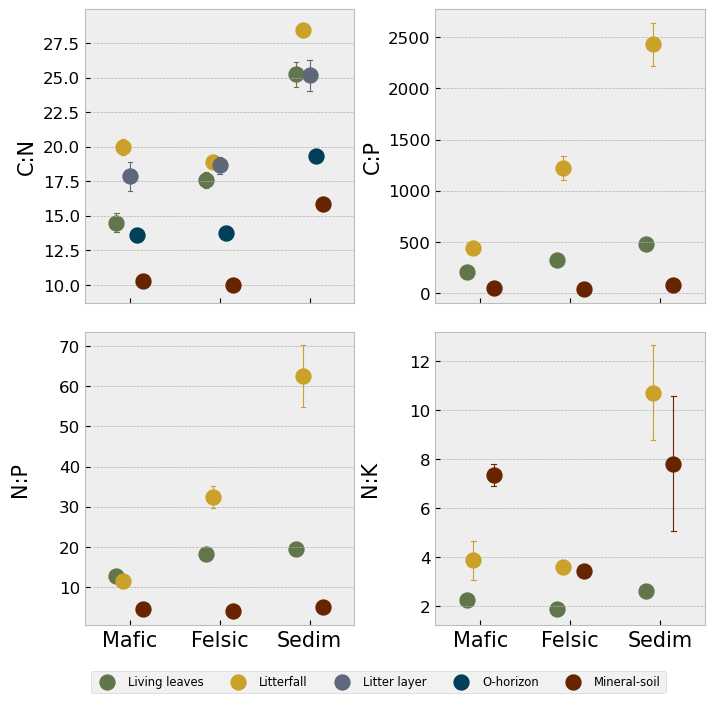

In [94]:
#plot the Nutrient ratio data

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
fig=plt.figure(figsize=[8,8])
plt.subplots_adjust(wspace=0.30, hspace=0.10)
#plt.style.use("_mpl-gallery")

# color_type={"Living leaves":"#61764B", "Litter fall":"#CCA129",
#            "Mineral-soil 0-10cm":"#662400"}
color_type={"Living leaves":"#61764B", "Litterfall":"#CCA129", "Litter layer":"#61677A", "O-horizon":"#024059",
           "Mineral-soil":"#662400"}
geochem=["Mafic", "Felsic","Sedim"]
plt.subplot(2,2,1)

sns.pointplot(x="region",y='CN',hue="type",errorbar="se", capsize=.05, linestyles="", dodge=0.3, order=geochem,errwidth=0.8,
hue_order=color_type,palette=color_type,data=all_cn_data)
plt.xlabel("")
plt.ylabel('C:N',size=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.legend(loc="lower left",bbox_to_anchor=(0, -1.35), ncols=5, fontsize="small")
ax=plt.gca()
ax.axes.xaxis.set_ticklabels("")

plt.subplot(2,2,2)

sns.pointplot(x="region",y='CP',hue="type",errorbar="se", errwidth=0.8,capsize=.05, linestyles="", dodge=0.3, order=geochem,
hue_order=color_type,palette=color_type,data=all_CNPK_data)
plt.xlabel("")
plt.ylabel('C:P',size=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.legend('',frameon=False)
ax=plt.gca()
ax.axes.xaxis.set_ticklabels("")

plt.subplot(2,2,3)

sns.pointplot(x="region",y='NP',hue="type",errorbar="se", capsize=.05, linestyles="", 
              dodge=0.3, order=geochem,hue_order=color_type,errwidth=0.8,palette=color_type,data=all_CNPK_data)
plt.xlabel("")
plt.ylabel('N:P\n',size=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.legend('',frameon=False)

plt.subplot(2,2,4)

sns.pointplot(x="region",y='NK',hue="type",errorbar="se", capsize=.05, linestyles="", dodge=0.3, order=geochem,hue_order=color_type,
errwidth=0.8,palette=color_type,data=all_CNPK_data)
plt.xlabel("")
plt.ylabel('N:K\n',size=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.legend('',frameon=False);
#fig.savefig('figures/Fig2.png', dpi=600,bbox_inches='tight', pad_inches=0.1);

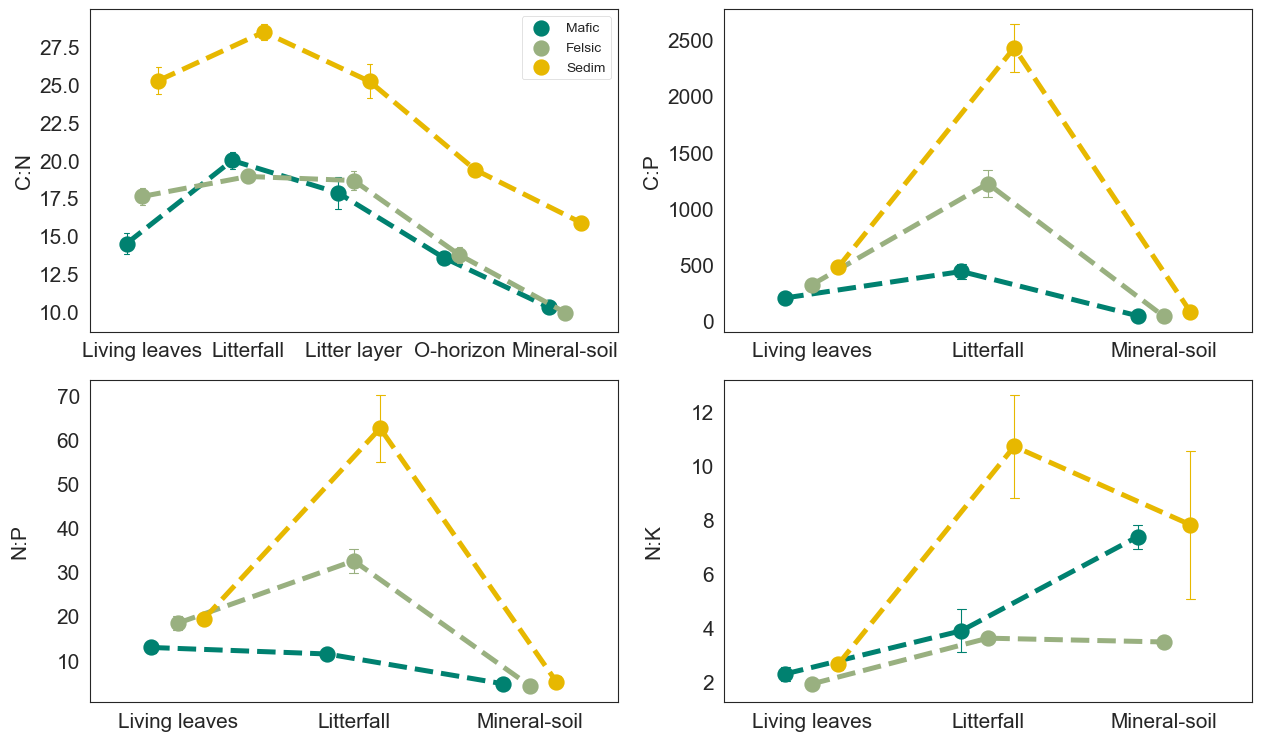

In [99]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
fig=plt.figure(figsize=[15,9])
plt.subplots_adjust(wspace=0.2, hspace=0.15)
sns.set_style("white")
geochem=["Mafic", "Felsic","Sedim"]
color_type=["Living leaves", "Litterfall", "Litter layer", "O-horizon",
           "Mineral-soil"]
color_type2=["Living leaves", "Litterfall",
           "Mineral-soil"]
colors={"Mafic":"#008170", "Felsic":"#99B080", "Sedim":"#E7B800"}


plt.subplot(2,2,1)

sns.pointplot(x="type",y='CN',hue="region",errorbar="se", capsize=.05, linestyles="--", dodge=0.3, palette=colors,
              hue_order=colors,order=color_type,
errwidth=0.8,data=all_cn_data)
plt.xlabel("")
plt.ylabel('C:N',size=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(loc="upper right")



plt.subplot(2,2,2)

sns.pointplot(x="type",y='CP',hue="region",errorbar="se", capsize=.05, linestyles="--", dodge=0.3, palette=colors,
              hue_order=colors,order=color_type2,
errwidth=0.8,data=all_CNPK_data)
plt.xlabel("")
plt.ylabel('C:P',size=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend('',frameon=False)


plt.subplot(2,2,3)
sns.pointplot(x="type",y='NP',hue="region",errorbar="se", capsize=.05, linestyles="--", dodge=0.3, palette=colors,
              hue_order=colors,order=color_type2,
errwidth=0.8,data=all_CNPK_data)
plt.xlabel("")
plt.ylabel('N:P\n',size=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend('',frameon=False)

plt.subplot(2,2,4)

sns.pointplot(x="type",y='NK',hue="region",errorbar="se", capsize=.05, linestyles="--", dodge=0.3, palette=colors,
              hue_order=colors,order=color_type2,
errwidth=0.8,data=all_CNPK_data)
plt.xlabel("")
plt.ylabel('N:K\n',size=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend('',frameon=False);
#fig.savefig('figures/Fig2b.png', dpi=600,bbox_inches='tight', pad_inches=0.1);

In [212]:
#Create a subset of canopy chemistry
traits_agg_sub=traits_agg[["plotID","N_mass", "P", "K","Ca","Mg","Na"]]
traits_agg_sub=traits_agg_sub.rename(columns={"N_mass":"N"})
traits_agg_sub.head()

plotID          N         P          K         Ca        Mg        Na
0   KBPL1  30.000254  2.028663   9.145580  10.056992  2.615660  0.070924
1  KBPL10  33.857574  2.926664  17.117632  12.319769  3.696900  0.063301
2  KBPL11  28.049149  2.833704  15.504388  11.207066  3.143740  0.038320
3  KBPL12  25.471390  1.630316  10.967192   6.852107  3.007433  0.036358
4   KBPL4  30.970188  1.779991  12.740349   5.555784  3.418260  0.032779

In [218]:
#look at the soil_10

soil_canopy=pd.merge(traits_agg_sub, soil_10, on="plotID", how="inner")
soil_canopy=soil_canopy.drop(columns=["region","type"])
soil_canopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   plotID    34 non-null     object 
 1   N         34 non-null     float64
 2   P         34 non-null     float64
 3   K         34 non-null     float64
 4   Ca        34 non-null     float64
 5   Mg        34 non-null     float64
 6   Na        34 non-null     float64
 7   pH_KCl    34 non-null     float64
 8   ECEC      34 non-null     float64
 9   P_avail   34 non-null     float64
 10  K_ex      34 non-null     float64
 11  Ca_ex     34 non-null     float64
 12  Mg_ex     34 non-null     float64
 13  Na_ex     34 non-null     float64
 14  Total_N   34 non-null     float64
 15  Total_C   34 non-null     float64
 16  Total_P   34 non-null     float64
 17  Total_K   34 non-null     float64
 18  Total_Ca  34 non-null     float64
 19  Total_Mg  34 non-null     float64
 20  Total_Na  34 non-null     float64


In [219]:
#try correlations with soil properties in top 10cm
correlations=np.round(soil_canopy.iloc[:,1:].corr(method="pearson"), 1)
#keep the significant correlations only
sub_correlations=correlations>=0.3
correlations=correlations[sub_correlations]
#sort the matrix of correlation values
correlations=correlations.loc[["N","P","K","Ca","Mg"],["pH_KCl","ECEC","P_avail","K_ex","Ca_ex","Mg_ex","Total_N","Total_P",
                                                        "Total_K","Total_Ca","Total_Mg"]]
#print the new matrix
correlations

pH_KCl  ECEC  P_avail  K_ex  Ca_ex  Mg_ex  Total_N  Total_P  Total_K  \
N      0.4   0.4      0.5   0.5    0.4    0.6      0.4      0.5      0.3   
P      0.4   0.5      0.5   0.6    0.4    0.7      0.5      0.5      0.4   
K      0.5   0.5      0.3   0.6    0.5    0.5      NaN      NaN      0.5   
Ca     0.8   0.7      0.4   0.7    0.8    0.6      NaN      NaN      0.5   
Mg     NaN   0.3      0.3   0.4    0.3    0.7      0.4      0.4      NaN   

    Total_Ca  Total_Mg  
N        0.4       0.6  
P        0.5       0.6  
K        0.5       0.4  
Ca       0.6       0.3  
Mg       0.4       0.8

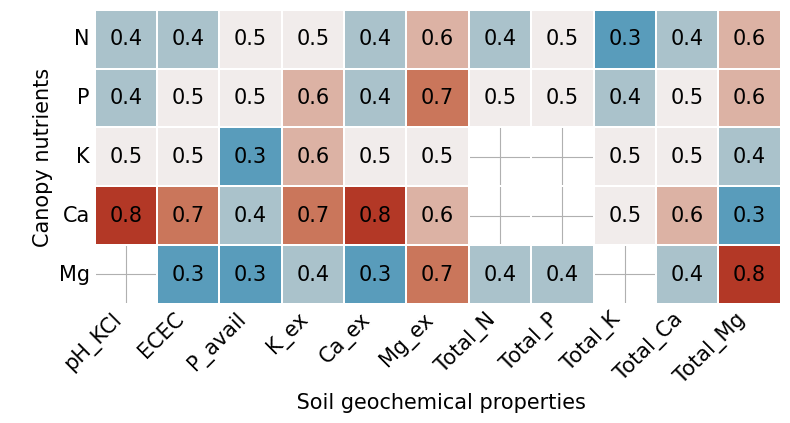

In [76]:
#create the figure
plt.style.use("_mpl-gallery")
fig= plt.figure(figsize=[7,3])
ax=sns.heatmap(correlations, annot=True,cmap="cmo.balance",fmt='.1f', annot_kws={"size": 15, "color":"black"},
vmin=0, vmax=1,cbar=False, linewidths=0.1, linecolor='white', 
robust=True, cbar_kws={'spacing':'uniform'})


# set the x-labels with
_, xlabels = plt.xticks()
_, ylabels = plt.yticks()
ax.set_xticklabels(xlabels,size=15,rotation=45, ha="right")
ax.set_yticklabels(ylabels,size=15,rotation=0, ha="right")

plt.ylabel("\nCanopy nutrients", fontsize=15)
plt.xlabel(" Soil geochemical properties",fontsize=15)
plt.show();
#fig.savefig('figures/Fig4.png', dpi=600,bbox_inches='tight', pad_inches=0.05);

In [106]:
#merge resoption data and geochemical data
import warnings
warnings.simplefilter(action="ignore")
resorp_df=litter_fresh_df_agg[["plotID","region","N_resorp","P_resorp","K_resorp","Mg_resorp", "NP_resorp","NK_resorp","NMg_resorp"]]
resorp_df.head()

plotID region   N_resorp   P_resorp   K_resorp  Mg_resorp  NP_resorp  \
0  KBPL10  Mafic  53.493589  45.391308  62.703580  20.371786   1.178499   
1  KBPL11  Mafic  60.094982  64.874511  71.368655  21.740237   0.926327   
2  KBPL12  Mafic  68.558330  50.964346  86.094258   4.151535   1.345221   
3   KBPL6  Mafic  59.979246  60.199699  77.279978  51.418205   0.996338   
4    NPL1  Sedim  -6.308370  78.173771  87.566394  30.021796  -0.080697   

   NK_resorp  NMg_resorp  
0   0.853119    2.625866  
1   0.842036    2.764228  
2   0.796317   16.513970  
3   0.776129    1.166498  
4  -0.072041   -0.210126

In [221]:
# #rename plotID in litter CN data
# resorp_df=resorp_df.replace({"plotID":{"KBPL13":"KBPL5","KBPL14":"KBPL1",
#                                        "KBPL15":"KBPL8","KBPL16":"KBPL9"}})

print(soil_10.plotID.unique())
print(resorp_df.plotID.unique())

['KBPL10' 'KBPL11' 'KBPL12' 'KBPL1' 'KBPL2' 'KBPL3' 'KBPL4' 'KBPL5'
 'KBPL6' 'KBPL7' 'KBPL8' 'KBPL9' 'NPL10' 'NPL11' 'NPL12' 'NPL1' 'NPL2'
 'NPL3' 'NPL4' 'NPL5' 'NPL6' 'NPL7' 'NPL8' 'NPL9' 'UPL10' 'UPL11' 'UPL12'
 'UPL1' 'UPL2' 'UPL3' 'UPL4' 'UPL5' 'UPL6' 'UPL7' 'UPL8' 'UPL9']
['KBPL10' 'KBPL11' 'KBPL12' 'KBPL6' 'NPL1' 'NPL10' 'NPL11' 'NPL12' 'NPL2'
 'NPL3' 'NPL4' 'NPL6' 'NPL7' 'NPL8' 'NPL9' 'UPL1' 'UPL10' 'UPL11' 'UPL12'
 'UPL2' 'UPL3' 'UPL4' 'UPL5' 'UPL6' 'UPL7' 'UPL8' 'UPL9']


In [109]:
#merge top 10 cm soils and resorption
resorp_soil=soil_10.merge(resorp_df,on=["plotID","region"], how="inner")
resorp_soil=resorp_soil.drop(columns=["type"])
print(resorp_soil.shape)
# print(resorp_soil.plotID.unique())
resorp_soil.head()

(27, 29)


plotID region  pH_KCl    ECEC  P_avail   K_ex   Ca_ex  Mg_ex  Na_ex  \
0  KBPL10  Mafic    5.40  33.206    32.78  0.793  24.251  7.359  0.043   
1  KBPL11  Mafic    4.35  15.772    35.25  1.279   8.972  3.578  0.043   
2  KBPL12  Mafic    3.60   9.991    33.76  0.332   2.904  1.405  0.040   
3   KBPL6  Mafic    4.60  19.625     7.74  0.332  11.776  6.714  0.043   
4   NPL10  Sedim    2.97   5.689    15.57  0.179   0.319  0.174  0.087   

   Total_N  ...         NK        NCa       NMg   N_resorp   P_resorp  \
0  0.95088  ...   6.853189   1.193909  2.587429  53.493589  45.391308   
1  0.72923  ...   7.292300   7.292300  7.292300  60.094982  64.874511   
2  0.93539  ...  10.601087  10.702163  5.179684  68.558330  50.964346   
3  0.64698  ...   7.865247   1.955826  1.723890  59.979246  60.199699   
4  0.35169  ...   3.516900   3.516900  3.516900  51.996127  78.424367   

    K_resorp  Mg_resorp  NP_resorp  NK_resorp  NMg_resorp  
0  62.703580  20.371786   1.178499   0.853119    2.625866  
1  71.368655  21.740237   0.926327   0.842036    2.764228  
2  86.094258   4.151535   1.345221   0.796317   16.513970  
3  77.279978  51.418205   0.996338   0.776129    1.166498  
4  78.750055  39.404383   0.663010   0.660268    1.319552  

[5 rows x 29 columns]

In [249]:
corr=np.round(resorp_soil.iloc[:,1:].corr(), 1)
corr_subset=corr.loc[["N_resorp","P_resorp","K_resorp","Mg_resorp","N_res:P_res","N_res:K_res"], 
                     ["pH_KCl","ECEC","P_avail","K_ex","Ca_ex","Mg_ex","Total_N","Total_P","Total_K","Total_Ca","Total_Mg"]]

list_t=[-0.2,-0.1,0.1,0.2]

def remove_elem(list_t, matrix):
    for i in list_t:
        matrix=matrix[matrix!=i]
    return matrix

corr_subset=remove_elem(list_t, corr_subset)

corr_subset

pH_KCl  ECEC  P_avail  K_ex  Ca_ex  Mg_ex  Total_N  Total_P  \
N_resorp        0.3   NaN      0.4   0.4    0.4    0.4      NaN      NaN   
P_resorp       -0.0   NaN     -0.4  -0.3   -0.3   -0.3     -0.4     -0.5   
K_resorp        NaN   NaN      NaN  -0.3   -0.3    NaN      NaN      NaN   
Mg_resorp      -0.3  -0.3     -0.5  -0.3   -0.3    NaN     -0.4      NaN   
N_res:P_res     NaN   NaN      0.4   0.4    0.3    0.4      0.3      0.4   
N_res:K_res     0.3   0.3      0.5   0.5    0.5    0.5      NaN      NaN   

             Total_K  Total_Ca  Total_Mg  
N_resorp         0.3       NaN       0.3  
P_resorp         NaN      -0.3      -0.4  
K_resorp        -0.3       NaN       NaN  
Mg_resorp        NaN       NaN       NaN  
N_res:P_res      0.4       0.3       0.4  
N_res:K_res      0.4       0.3       0.4

In [231]:
biomass_data=pd.read_csv('c:\\Users\\bebu0001\\slu\\paper-projects\\eco-analysis\\analysis\\biomass_data_complete.csv', delimiter=';')
biomass_data.head()

region slope plot_id plotID     CWM_N    CWM_CN        RGR        wd  \
0  Felsic    PL    UPL1   UPL1  2.762417  17.571194  3.793229  0.518001   
1  Felsic     V   UPL10  UPL10  2.436939  17.712315  6.127294  0.553606   
2  Felsic     V   UPL11  UPL11  2.738659  17.792321  5.597379  0.536808   
3  Felsic     V   UPL12  UPL12  2.401791  19.987860  2.970170  0.524670   
4  Felsic    PL    UPL2   UPL2  2.964903  16.475138  3.648227  0.534013   

   ACW_Cstock  L_O_Cstock  ...  Total_Ca  Total_K  Total_Mg      TRB  \
0  133.225822    5.126365  ...   0.35766  0.14364   0.30043  0.80173   
1   49.515919    3.779753  ...   0.42218  0.17442   0.36606  0.96266   
2   85.942411    2.895072  ...   0.43067  0.16950   0.35265  0.95282   
3  143.924593    6.216836  ...   0.40295  0.16861   0.32031  0.89187   
4  122.952875    5.448112  ...   0.37696  0.15867   0.30823  0.84386   

    Total_P  Total_N         CN         SOC   MAP   MAT  
0  0.039455  0.50676   9.574809  175.473604  1702  19.2  
1  0.091469  0.33458  10.110586  130.888834  1702  19.2  
2  0.086812  0.32561   9.498664  107.198857  1702  19.2  
3  0.033731  0.26074  11.649267  102.284040  1702  19.2  
4  0.034837  0.40728   9.925825  113.616765  1702  19.2  

[5 rows x 51 columns]

In [232]:
biomass_resorp=biomass_data[["plotID","RGR","wd","ACW_Cstock","L_O_Cstock","Root_Cstock","NPProot",
                             "NPPLitter","NPPACW","dbh","Tree_height"]].merge(resorp_df,on=["plotID"], how="inner")
biomass_resorp.head()

plotID       RGR        wd  ACW_Cstock  L_O_Cstock  Root_Cstock   NPProot  \
0   UPL1  3.793229  0.518001  133.225822    5.126365     7.440472  2.793304   
1  UPL10  6.127294  0.553606   49.515919    3.779753     6.704200  1.833236   
2  UPL11  5.597379  0.536808   85.942411    2.895072     9.211360  2.321192   
3  UPL12  2.970170  0.524670  143.924593    6.216836     7.555085  2.596480   
4   UPL2  3.648227  0.534013  122.952875    5.448112     6.731443  1.670605   

   NPPLitter    NPPACW        dbh  Tree_height   N_resorp   P_resorp  \
0   4.642500  4.833815  28.252239    16.075000  53.687288  76.513001   
1   2.882996  2.824686  27.659375    18.200000  51.604240  47.824917   
2   3.107794  4.506130  27.805769    19.945455  47.995383  59.392039   
3   3.269885  4.128322  35.619149    19.433333  53.439223  79.274349   
4   2.901930  4.297797  26.640964    16.476923  53.043017  53.511144   

    K_resorp  Mg_resorp  N_res:P_res  N_res:K_res  
0  83.970588  30.229807     0.701675     0.639358  
1  61.443716   0.423576     1.079024     0.839862  
2  64.667081  14.328645     0.808111     0.742192  
3  75.440285  15.161867     0.674105     0.708365  
4  68.850663  33.414514     0.991252     0.770407

In [233]:
#Load the fine roots data
fine_roots=pd.read_excel("c:\\Users\\bebu0001\\slu\\paper-projects\\eco-analysis\\analysis\\fine_roots.xlsx")
fine_roots.head()

plotID layer  production
0  KBPL10     1    0.040475
1  KBPL10     2    0.165059
2  KBPL10     3    0.039747
3  KBPL10     4    0.030523
4  KBPL10     O    0.188761

In [234]:
# Calculate the sum of coverage for each plotID layer
total_roots = fine_roots.groupby('plotID')['production'].transform(sum)
# Create a new column proportion
fine_roots['proportion'] = fine_roots['production']*100/total_roots
fine_roots.head()

plotID layer  production  proportion
0  KBPL10     1    0.040475    8.712546
1  KBPL10     2    0.165059   35.529739
2  KBPL10     3    0.039747    8.555802
3  KBPL10     4    0.030523    6.570266
4  KBPL10     O    0.188761   40.631647

In [235]:
#melt the fine rooots data by converting depth to columns
fine_roots_pivot=pd.pivot_table(fine_roots,index="plotID", columns="layer", values="proportion").reset_index()
fine_roots_pivot=fine_roots_pivot.rename(columns={1:"roots 0-10cm",2:"roots 10-20cm",3:"roots 20-30cm",
                                                  4:"roots 30-50cm", "O":"roots O-horizon"})
fine_roots_pivot.head()

layer  plotID  roots 0-10cm  roots 10-20cm  roots 20-30cm  roots 30-50cm  \
0      KBPL10      8.712546      35.529739       8.555802       6.570266   
1      KBPL11      3.715469      10.968974       2.570883       5.403165   
2      KBPL12     13.731822       9.531653       4.497085       5.126193   
3      KBPL13     29.332619       4.534977       5.593139       6.802466   
4      KBPL14     11.480891       1.742882       3.491651       0.788152   

layer  roots O-horizon  
0            40.631647  
1            77.341509  
2            67.113248  
3            53.736800  
4            82.496424

In [236]:
resorp_root_density=fine_roots_pivot.merge(resorp_df[["plotID","N_resorp","N_res:P_res","P_resorp","K_resorp","N_res:K_res","Mg_resorp"]],on=["plotID"], how="inner")
resorp_biomass=resorp_root_density.merge(biomass_data[['plotID', 'RGR', 'wd','ACW_Cstock', 'L_O_Cstock', 'Root_Cstock', 'NPProot', 'NPPLitter',
       'NPPACW', 'totalNPP', 'root_allocation','litter_allocation', 'ACW_allocation']],on="plotID", how="inner")
resorp_biomass.head()

plotID  roots 0-10cm  roots 10-20cm  roots 20-30cm  roots 30-50cm  \
0  KBPL10      8.712546      35.529739       8.555802       6.570266   
1  KBPL11      3.715469      10.968974       2.570883       5.403165   
2  KBPL12     13.731822       9.531653       4.497085       5.126193   
3   KBPL6     28.661679      17.212326       7.061573      11.090548   
4    NPL1      9.773700       6.585645       1.864619       2.459086   

   roots O-horizon   N_resorp  N_res:P_res   P_resorp   K_resorp  ...  \
0        40.631647  53.493589     1.178499  45.391308  62.703580  ...   
1        77.341509  60.094982     0.926327  64.874511  71.368655  ...   
2        67.113248  68.558330     1.345221  50.964346  86.094258  ...   
3        35.973873  59.979246     0.996338  60.199699  77.279978  ...   
4        79.316951  -6.308370    -0.080697  78.173771  87.566394  ...   

   ACW_Cstock  L_O_Cstock  Root_Cstock   NPProot  NPPLitter    NPPACW  \
0   87.266481   14.680601     3.657186  0.464566   4.194556  6.110827   
1  120.252396   11.281954     4.038030  2.766541   4.725869  8.421607   
2   72.684664    9.729831     5.962814  1.288813   4.608301  4.508945   
3  115.469875    7.186845     7.368538  0.941409   5.538176  7.202652   
4  188.963371   53.949276    14.739760  6.060279   4.312070  4.200089   

    totalNPP  root_allocation  litter_allocation  ACW_allocation  
0  10.769948         0.043135           0.389468        0.567396  
1  15.914017         0.173843           0.296963        0.529194  
2  10.406059         0.123852           0.442848        0.433300  
3  13.682238         0.068805           0.404771        0.526424  
4  14.572437         0.415873           0.295906        0.288221  

[5 rows x 24 columns]

In [250]:
corr2=np.round(resorp_biomass.iloc[:,1:].corr(), 1)
corr2
corr_subset2=corr2.loc[["N_resorp","P_resorp","K_resorp","Mg_resorp","N_res:P_res","N_res:K_res"], 
                       ['RGR', 'wd','ACW_Cstock', 'L_O_Cstock', 'Root_Cstock','roots O-horizon','roots 0-10cm', 'roots 10-20cm', 'roots 20-30cm',
       'roots 30-50cm']]
corr_subset2=remove_elem(list_t, corr_subset2)
corr_subset2

RGR   wd  ACW_Cstock  L_O_Cstock  Root_Cstock  roots O-horizon  \
N_resorp     0.5 -0.4        -0.4        -0.7         -0.5             -0.4   
P_resorp    -0.5  0.5         0.5         0.4          0.5              NaN   
K_resorp    -0.3  0.3         0.4         NaN          0.4              0.4   
Mg_resorp   -0.5  NaN         0.4         0.3          NaN              NaN   
N_res:P_res  0.5 -0.5        -0.5        -0.6         -0.6             -0.4   
N_res:K_res  0.6 -0.5        -0.5        -0.7         -0.6             -0.5   

             roots 0-10cm  roots 10-20cm  roots 20-30cm  roots 30-50cm  
N_resorp              0.3            0.3            0.4            0.4  
P_resorp              NaN           -0.5            NaN            NaN  
K_resorp             -0.3           -0.5           -0.3            NaN  
Mg_resorp             NaN            NaN            NaN            NaN  
N_res:P_res           NaN            0.5            0.3            NaN  
N_res:K_res           0.4            0.5            0.4            0.3

In [241]:
import cmocean as cmo

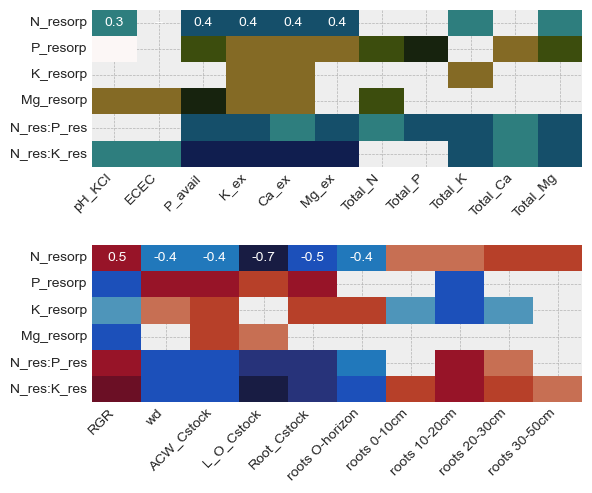

In [261]:
# plot correlations between nutrient resorption, soil properties and biomass stocks
plt.style.use("_mpl-gallery")
fig=plt.figure(figsize=[5,4])
plt.subplots_adjust(hspace=0.5)
plt.subplot(211)

sns.heatmap(corr_subset, annot=True,cmap='cmo.tarn',fmt='.1f',
           cbar=False,center=0)
plt.xticks(rotation=45, ha="right")


plt.subplot(212)
sns.heatmap(corr_subset2, annot=True,cmap='cmo.balance',fmt='.1f',
           cbar=False,center=0)
plt.xticks(rotation=45, ha="right")
plt.show()
#fig.savefig('figures/Fig5.png', dpi=600,bbox_inches='tight', pad_inches=0.05);

In [104]:
#import essential libraries
import arviz as az
import bambi as bmb
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [111]:
resorp_soil["TRB"]=resorp_soil.Total_K+resorp_soil.Total_Ca+resorp_soil.Total_Mg+resorp_soil.Total_Na
resorp_soil["Base_ex"]=resorp_soil.K_ex+resorp_soil.Ca_ex+resorp_soil.Mg_ex+resorp_soil.Na_ex
# store cleaned data on the local drive
resorp_soil.to_csv("processed/resorpt_soil.csv", index=False)

In [112]:
resorp_soil.head()

plotID region  pH_KCl    ECEC  P_avail   K_ex   Ca_ex  Mg_ex  Na_ex  \
0  KBPL10  Mafic    5.40  33.206    32.78  0.793  24.251  7.359  0.043   
1  KBPL11  Mafic    4.35  15.772    35.25  1.279   8.972  3.578  0.043   
2  KBPL12  Mafic    3.60   9.991    33.76  0.332   2.904  1.405  0.040   
3   KBPL6  Mafic    4.60  19.625     7.74  0.332  11.776  6.714  0.043   
4   NPL10  Sedim    2.97   5.689    15.57  0.179   0.319  0.174  0.087   

   Total_N  ...       NMg   N_resorp   P_resorp   K_resorp  Mg_resorp  \
0  0.95088  ...  2.587429  53.493589  45.391308  62.703580  20.371786   
1  0.72923  ...  7.292300  60.094982  64.874511  71.368655  21.740237   
2  0.93539  ...  5.179684  68.558330  50.964346  86.094258   4.151535   
3  0.64698  ...  1.723890  59.979246  60.199699  77.279978  51.418205   
4  0.35169  ...  3.516900  51.996127  78.424367  78.750055  39.404383   

   NP_resorp  NK_resorp  NMg_resorp       TRB  Base_ex  
0   1.178499   0.853119    2.625866  1.346635   32.446  
1   0.926327   0.842036    2.764228  0.400000   13.872  
2   1.345221   0.796317   16.513970  0.371863    4.681  
3   0.996338   0.776129    1.166498  0.828327   18.865  
4   0.663010   0.660268    1.319552  0.400000    0.759  

[5 rows x 31 columns]

In [144]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

trans = StandardScaler()
# fit and transform the data

cov_trans = trans.fit_transform(resorp_soil[["P_resorp","P_avail","Total_P","TRB","Base_ex"]])
# convert the array back to a dataframe
cov_trans=pd.DataFrame(cov_trans , columns=["P_resorp","P_avail","Total_P","TRB","Base_ex"])
cov_trans["region"]=resorp_soil["region"]
cov_trans.head()

P_resorp   P_avail   Total_P       TRB   Base_ex region
0 -1.787604  1.308679  3.535578  3.553684  2.260907  Mafic
1 -0.457578  1.496231  0.069815 -0.034140  0.342415  Mafic
2 -1.407159  1.383092  1.825201 -0.140782 -0.606916  Mafic
3 -0.776705 -0.592665  1.230340  1.589254  0.858138  Mafic
4  0.467406  0.001884  0.069815 -0.034140 -1.012016  Sedim

In [162]:
#Specify model and examine priors
seed=7
model_P = bmb.Model("P_resorp ~ 0+P_avail + Total_P", cov_trans, family="gaussian", link="identity")
fitted_P = model_P.fit(tune=2000, draws=2000, init="adapt_diag", random_seed=seed,cores=None,inference_method='mcmc')

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [P_resorp_sigma, P_avail, Total_P]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 20 seconds.


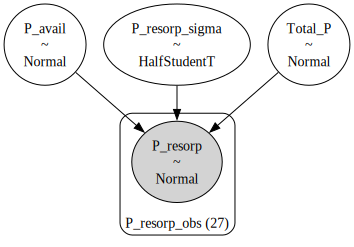

In [163]:
model_P.build()

model_P.graph()

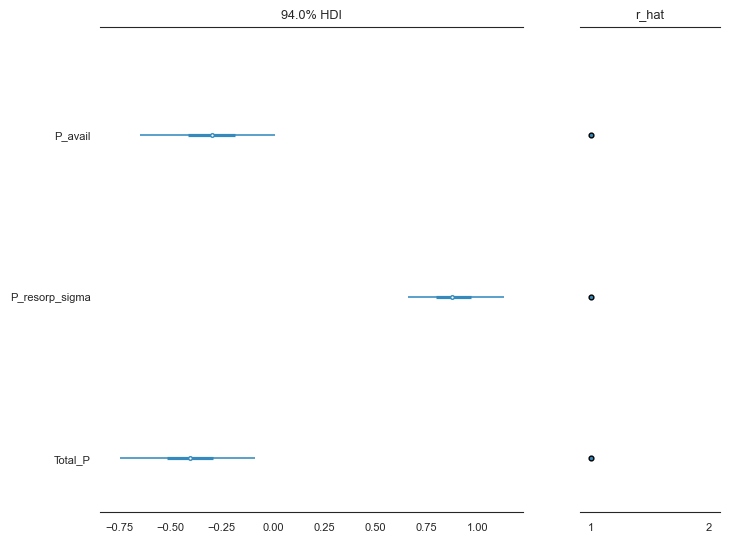

In [164]:
az.plot_forest(data=fitted_P, r_hat=True, combined=True, textsize=8);

In [412]:
#Specify model and examine priors
seed=7
model_P = bmb.Model("P_resorp	~ P_avail + Total_P+TRB+Base_ex", cov_trans, family="gaussian")
fitted_P = model_P.fit(tune=2000, draws=2000, init="adapt_diag", random_seed=seed,cores=None,inference_method='mcmc')

model_N = bmb.Model("N_resorp	~ Total_N+TRB+Base_ex", cov_trans, family="gaussian")
fitted_N = model_N.fit(tune=2000, draws=2000, init="adapt_diag", random_seed=seed,cores=None,inference_method='mcmc')

model_K = bmb.Model("K_resorp	~ K_ex+ Total_K+TRB+Base_ex", cov_trans, family="gaussian")
fitted_K = model_K.fit(tune=2000, draws=2000, init="adapt_diag", random_seed=seed,cores=None,inference_method='mcmc')

model_Mg = bmb.Model("Mg_resorp	~ Mg_ex+Total_Mg+TRB+Base_ex", cov_trans, family="gaussian")
fitted_Mg = model_Mg.fit(tune=2000, draws=2000, init="adapt_diag", random_seed=seed,cores=None,inference_method='mcmc')

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [P_resorp_sigma, Intercept, P_avail, Total_P, TRB, Base_ex]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 22 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [N_resorp_sigma, Intercept, Total_N, TRB, Base_ex]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 21 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [K_resorp_sigma, Intercept, K_ex, Total_K, TRB, Base_ex]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 22 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Mg_resorp_sigma, Intercept, Mg_ex, Total_Mg, TRB, Base_ex]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 24 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


In [409]:
#"Examine the model results"
az.summary(fitted_P)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Base_ex         0.166  0.323  -0.426    0.790      0.005    0.003    4681.0   
Intercept       0.001  0.182  -0.346    0.343      0.002    0.002    8533.0   
P_avail        -0.350  0.221  -0.748    0.085      0.003    0.002    6005.0   
P_resorp_sigma  0.941  0.148   0.686    1.216      0.002    0.001    5613.0   
TRB            -0.241  0.347  -0.891    0.414      0.005    0.004    4176.0   
Total_P        -0.303  0.245  -0.727    0.183      0.003    0.002    5134.0   

                ess_tail  r_hat  
Base_ex           5352.0    1.0  
Intercept         5429.0    1.0  
P_avail           5518.0    1.0  
P_resorp_sigma    4398.0    1.0  
TRB               5310.0    1.0  
Total_P           5577.0    1.0

In [381]:
#"Examine the model results"
az.summary(fitted_N)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Base_ex         0.298  0.290  -0.246    0.852      0.004    0.003    5640.0   
Intercept       0.003  0.195  -0.366    0.374      0.002    0.002    7861.0   
N_resorp_sigma  1.027  0.150   0.765    1.309      0.002    0.001    6328.0   
TRB             0.121  0.307  -0.436    0.719      0.004    0.003    5252.0   
Total_N        -0.036  0.221  -0.453    0.378      0.003    0.002    7712.0   

                ess_tail  r_hat  
Base_ex           4977.0    1.0  
Intercept         5068.0    1.0  
N_resorp_sigma    5651.0    1.0  
TRB               5028.0    1.0  
Total_N           6051.0    1.0

In [382]:
#"Examine the model results"
az.summary(fitted_K)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Base_ex         0.068  0.385  -0.647    0.797      0.006    0.004    4102.0   
Intercept       0.000  0.205  -0.384    0.387      0.002    0.002    9094.0   
K_ex           -0.184  0.310  -0.783    0.382      0.005    0.003    4515.0   
K_resorp_sigma  1.058  0.163   0.776    1.365      0.002    0.002    6161.0   
TRB            -0.175  0.370  -0.883    0.506      0.006    0.004    4470.0   
Total_K        -0.141  0.330  -0.766    0.477      0.005    0.003    5187.0   

                ess_tail  r_hat  
Base_ex           4890.0    1.0  
Intercept         5502.0    1.0  
K_ex              4979.0    1.0  
K_resorp_sigma    4979.0    1.0  
TRB               5005.0    1.0  
Total_K           5093.0    1.0

In [413]:
#"Examine the model results"
az.summary(fitted_Mg)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Base_ex         -0.943  0.609  -2.059    0.251      0.012    0.009    2570.0   
Intercept        0.002  0.201  -0.378    0.379      0.002    0.003    6639.0   
Mg_ex            0.709  0.762  -0.721    2.176      0.014    0.010    2820.0   
Mg_resorp_sigma  1.044  0.158   0.775    1.341      0.002    0.002    4612.0   
TRB              0.380  0.548  -0.674    1.370      0.009    0.007    3426.0   
Total_Mg        -0.459  0.657  -1.656    0.808      0.013    0.009    2702.0   

                 ess_tail  r_hat  
Base_ex            4084.0    1.0  
Intercept          4904.0    1.0  
Mg_ex              4011.0    1.0  
Mg_resorp_sigma    3683.0    1.0  
TRB                4017.0    1.0  
Total_Mg           3880.0    1.0

<Figure size 3000x3000 with 0 Axes>

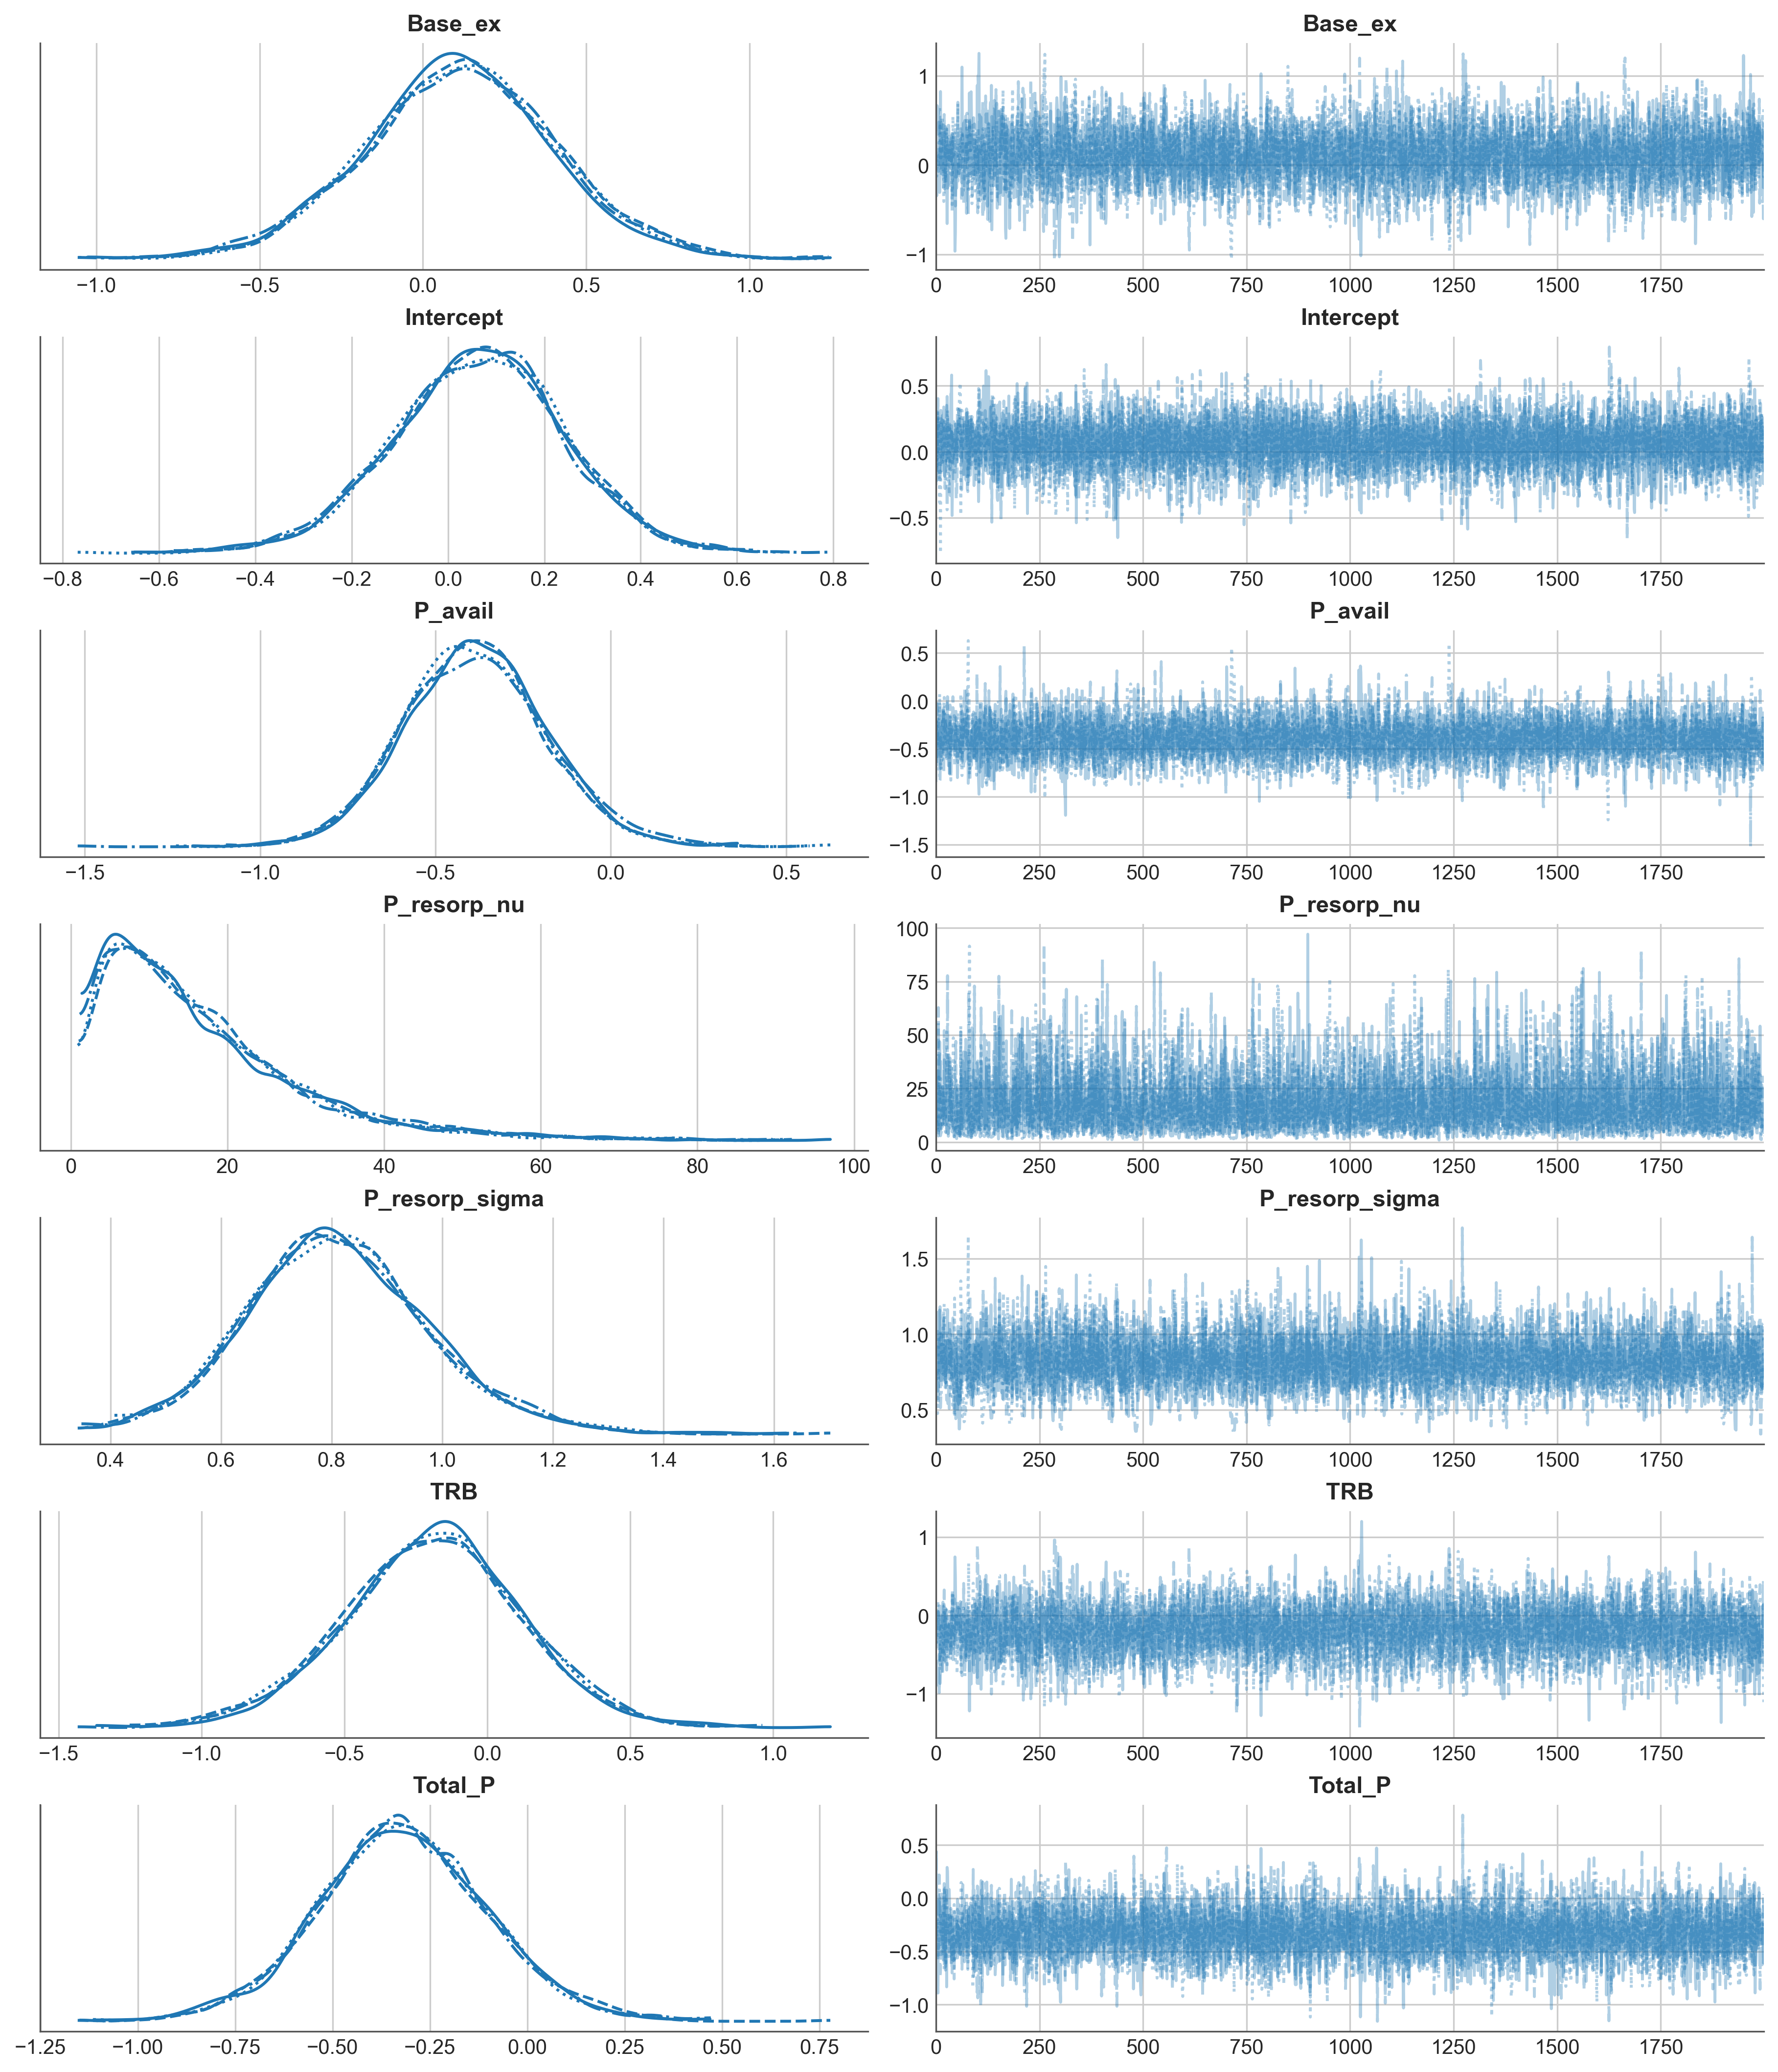

In [340]:
#plot the results
fig=plt.figure(figsize=[10,10])
plt.style.use("_mpl-gallery")
az.plot_trace(fitted);

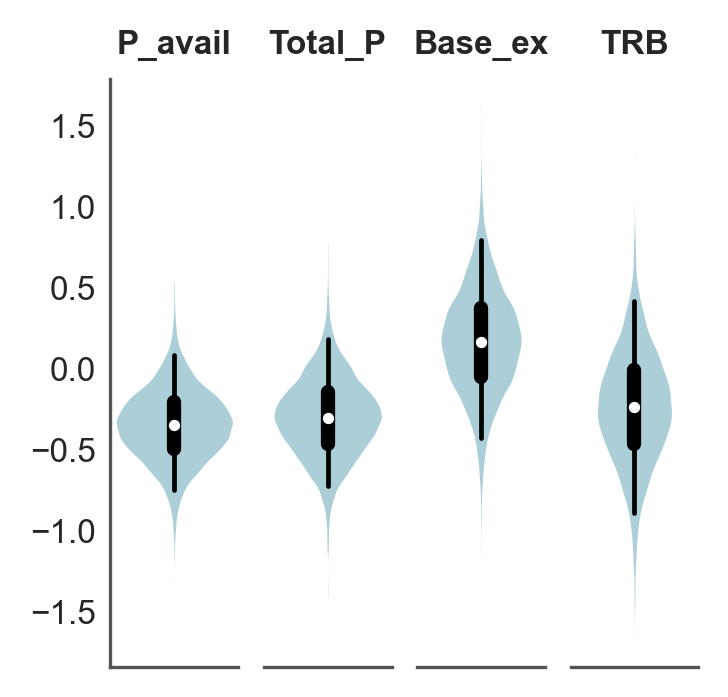

In [404]:
import matplotlib.pyplot as plt

import arviz as az

az.style.use("arviz-doc")
az.plot_violin(
    fitted_P,
    var_names=["P_avail", "Total_P","Base_ex","TRB"],textsize=8,side="both", figsize=[2,2])

plt.show();

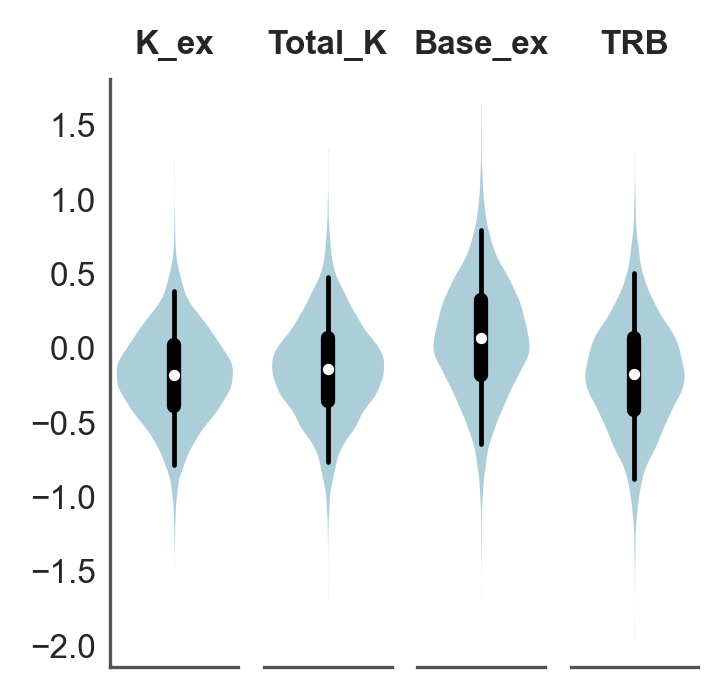

In [405]:
az.plot_violin(
    fitted_K,
    var_names=["K_ex", "Total_K","Base_ex","TRB"],textsize=8,side="both", figsize=[2,2])

plt.show();

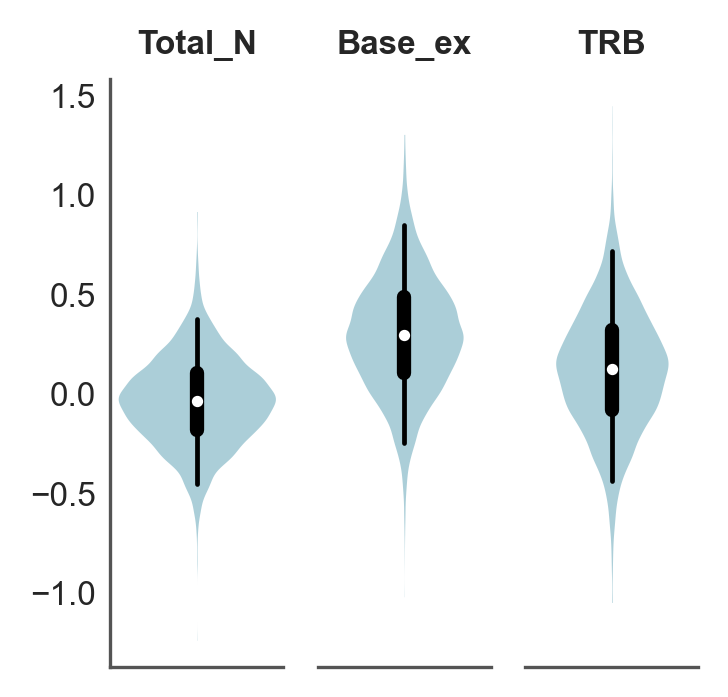

In [406]:
az.plot_violin(
    fitted_N,
    var_names=["Total_N","Base_ex","TRB"],textsize=8,side="both", figsize=[2,2])

plt.show();

In [ ]:
az.plot_violin(
    fitted_Mg,
    var_names=["Mg_ex","Total_Mg","Base_ex","TRB"],textsize=8,side="both", figsize=[2,2])

plt.show();